# **Predictive Modeling of Chest Pain and Shortness of Breath in a Diverse Population:</br>A Multivariate Analysis of Health and Lifestyle Factors**


## **Mohammad Hossein Mahmoudi**

--- 
---

## **Project Content** <a id = 0></a>

### Zeroth Step: Dataset Management

1. [Introduction](#1)
2. [Load The Relevant Libraries and Packages](#2)
3. [Create a File Management System and Read the XPT Files](#3)
4. [Select the Important Features from the Datasets](#4)
5. [Monitor the Datasets and Merge them into a Final Object](#5)
6. [Prepare the Dataframe in a Superficial Way](#6)

### First Step: Data Preprocessing

7. [Load the Dataset from This Working Directory](#7)
8. [Deal with the Missing Values and Impute the Features](#8)
9. [Scale the Numeric Features](#9)
10. [Encode the Categorical Features](#10)

### Second Step: Exploratory Data Analysis

11. [Examine the Statistics of Numeric Features](#11)
12. [Examine the Statistics of Categorical Features](#12)

### Forth and Final Step: Modeling and Examination

13. [Split the Data into Train and Test Sets](#13)
14. [Logistic Regression Model](#14)
15. [Decision Tree Model](#15)
16. [Random Forest Model](#16)
17. [Naive Bayes Model](#17)
18. [Multi Layer Perceptron Model](#18) 

***

# Zeroth Step: Dataset Management

***

## 1. Introduction <a id = 1></a>

### **Problem Explanation**

<div style="text-align: justify">
The problem at hand involves predicting the likelihood of experiencing chest pain and shortness of breath, which are key indicators of potential heart-related issues such as a heart attack. The dataset includes various demographic and health-related features that could potentially contribute to the prediction. The specific features are Gender, Age, Race, BMI (Body Mass Index), Diabetes status, Physical activity level, Lifetime cigarette consumption, Current smoking habits, Family poverty level, and Alcohol consumption.

The goal is to develop a machine learning model that can effectively anticipate the occurrence of chest pain and shortness of breath based on the provided features. By identifying individuals at risk of these symptoms, healthcare professionals can intervene early, potentially preventing or mitigating the risk of a heart attack. The prediction model aims to enhance the accuracy and efficiency of identifying individuals who may be susceptible to cardiovascular issues

</div>

[Project Content](#0)

# 2. Load The Relevant Libraries and Packages <a id = 2></a>

In order to manage the directories, work with files and load the datasets as dataframes, the relevant libraries are imported.

In [1]:
# Import standard libraries for file and directory operations
import os
os.environ["TF_METAL_ALLOW_HW"] = "0"

import fnmatch
import shutil

# Import data manipulation libraries
import pandas as pd  # Pandas for handling data in tabular form
import numpy as np   # NumPy for numerical operations

# Import a third-party library for natural sorting
from natsort import natsorted  # natsort for natural sorting of strings

# Redundant import of numpy, already imported above
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Import libraries for data preprocessing and modeling
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import library for handling imbalanced datasets
from sklearn.utils import resample

# Import libraries for model evaluation and tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.naive_bayes import GaussianNB

# Import library for handling imbalanced datasets
from imblearn.over_sampling import RandomOverSampler

# Import TensorFlow and set memory growth
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
# Import Keras and backend functions
from keras import backend as K

# Import Keras model-related modules
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers.legacy import Adam
from keras.metrics import F1Score, Recall

import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Import scikit-learn metrics for model evaluation
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, auc

[Project Content](#0)

# 3. Create a File Management System and Read the XPT Files <a id = 3></a>

The goal of this code block is to manage the creation of a temporary folder named "tmp" within the current working directory.</br>
The existing "tmp" folder, if present, is removed to ensure a fresh start.</br>
The code then proceeds to create a new "tmp" folder, providing an organized and clean space for subsequent operations.

In [2]:
# Get the current working directory
current_directory = os.getcwd()

# Create the full path to the new folder.
tmp_folder_path = os.path.join(current_directory, "tmp")

# Remove the existing folder if it exists.
if os.path.exists(tmp_folder_path):
    shutil.rmtree(tmp_folder_path)

# Create the new folder.
os.makedirs(tmp_folder_path)

At this stage, the code compiles and displays a list of directories in the current working directory, excluding ".git".</br>
The total number of folders is presented along with their names, providing a concise overview of the directory structure.

In [3]:
# List all directories in the current directory
directories = [d for d in os.listdir(current_directory) if os.path.isdir(os.path.join(current_directory, d)) and d != ".git"]

# Display the number of folders in the current directory
print(f"There is/are {len(directories)} folder(s) in the current directory:")
print()

# Print each directory name on a new line
for dir in directories:
    print(f"{directories.index(dir) + 1}. {dir}")

There is/are 3 folder(s) in the current directory:

1. Datasets
2. Figures
3. tmp


At this point, the script is programmed to systematically scan through a designated root directory and its subdirectories, seeking files with a ".XPT" extension.</br>
During this exploration, the code assembles a list containing the full paths to each identified ".XPT" file.</br>
The ultimate objective is to compile a comprehensive collection of file paths for all ".XPT" files within the specified directory and its subdirectories.

In [4]:
def find_xpt_files(root_dir):
    """
    Find .XPT files in a directory and its subdirectories.

    Parameters:
    - root_dir (str): The root directory to start searching for .XPT files.

    Returns:
    - List[str]: A list of full paths to .XPT files found in the specified directory and its subdirectories.
    """

    # Initialize an empty list to store the file paths
    xpt_files = []

    # Walk through the directory tree rooted at root_dir.
    for root, dirs, files in os.walk(root_dir):
        
        # For each file with a .XPT extension, add its full path to the xpt_files list.
        for filename in fnmatch.filter(files, "*.XPT"):
            xpt_files.append(os.path.join(root, filename))

    return xpt_files

At this stage, the script sets the current working directory as the root directory and executes a process to identify files with a specific extension (".XPT") within this directory and its subdirectories.</br>
The discovered file paths are then stored and subsequently printed, providing a detailed list of these file locations within the designated directory structure.

In [5]:
# Specify the current directory as the root directory.
current_directory = os.getcwd()

# Call the find_xpt_files function with the current directory.
xpt_file_paths = find_xpt_files(current_directory)

# Print each found .XPT file path on a new line.
for xpt_file_path in xpt_file_paths:
    print(xpt_file_path)

/Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/Datasets/Questionnaire Data/Smoking - Cigarette Use/P_SMQ.XPT
/Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/Datasets/Questionnaire Data/Income/P_INQ.XPT
/Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/Datasets/Questionnaire Data/Diabetes/P_DIQ.XPT
/Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/Datasets/Questionnaire Data/Cardiovascular Health/P_CDQ.XPT
/Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/Datasets/Questionnaire Data/Physical Activity/P_PAQ.XPT
/Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/Datasets/Questionnaire Data/Alcohol Use/P_ALQ.XPT
/Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/Datasets/Examination Data/Body Measures/P_BMX.XPT
/Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/Datasets/Demographic Variables and Sample Weights/P_DEMO.XPT


In this segment, a specific path is defined for the destination folder where files will be copied. The script checks for the existence of this folder.</br>
If the folder exists, the code iterates through each ".XPT" file in the list and identifies the subdirectories between the current directory and the file.</br>
The new file name is determined, and a full path to the new location within the designated folder is created.</br>
The ".XPT" file is then copied to the newly specified location.</br>
Upon completion, a message is printed indicating the successful copying of files to the designated folder. If the folder does not exist, a corresponding message is displayed.

In [6]:
# Specify the path for the new folder where the files will be copied
datasets_path = os.path.join(current_directory, "tmp")

# Check if the folder exists
if os.path.exists(datasets_path):
    
    # Loop through each .XPT file in the list.
    for xpt_file_path in xpt_file_paths:

        # Determine the subdirectories between the current directory and the file.
        new_file_name = os.path.relpath(xpt_file_path, current_directory).split(os.path.sep)[-2]

        # Create the full path to the new location for the file within the new folder.
        new_file_path = os.path.join(datasets_path, new_file_name)
        new_file_path += ".XPT"

        # Copy the .XPT file to the new location.
        shutil.copy(xpt_file_path, new_file_path)

    print(f"Files copied to: {datasets_path}")

else:
    print(f"The '{datasets_path}' folder does not exist.")

Files copied to: /Users/shahriyar/Desktop/Study/SUT/Data Mining/Data-Mining-Project/tmp


In this section, an empty dictionary is initialized to store datasets. The function for identifying ".XPT" files is applied to the new datasets folder.</br>
Each file is processed to extract the dataset name, and its content is read into a DataFrame, which is then stored in the dictionary.</br>
The subsequent loop displays the name and shape (number of rows and columns) of each dataset in the dictionary for a concise overview of dataset information.

In [7]:
# Initialize an empty dictionary to store datasets
dataset_dict = {}

# Call the find_xpt_files function with the new datasets path
xpt_file_paths = find_xpt_files(datasets_path)

# Loop through each XPT file path to read it
for xpt_file_path in xpt_file_paths:

    # Extract the dataset name from the file path
    dataset_name = os.path.basename(xpt_file_path).split(".")[0]

    # Read the XPT file into a DataFrame and store it in the dictionary
    dataset_dict[dataset_name] = pd.read_sas(xpt_file_path, format="xport")

# Iterate through each dataset in the dictionary to display their information
for key in dataset_dict.keys():

    # Print dataset name
    print(key)
    
    # Print dataset shape (number of rows and columns)
    print(dataset_dict[key].shape)
    
    # Print an empty line for better readability
    print()

Diabetes
(14986, 28)

Demographic Variables and Sample Weights
(15560, 29)

Smoking - Cigarette Use
(11137, 16)

Alcohol Use
(8965, 10)

Cardiovascular Health
(6433, 17)

Income
(15560, 3)

Physical Activity
(9693, 17)

Body Measures
(14300, 22)



[Project Content](#0)

# 4. Select the Important Features from the Datasets <a id = 4></a>

Before going further, let's find out the values each feature can be assigned for each record.

### **Features**

- **Demographic Variables and Sample Weights**

    <span style="color: grey; font-size: 200%;">&bull;</span> SEQN - Respondent sequence number</br>
    <span style="color: grey; font-size: 200%;">&bull;</span> RIAGENDR - Gender</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 1             | Male              |
    | 2             | Female            |
    | ...           | Missing           |

    <span style="color: grey; font-size: 200%;">&bull;</span> RIDAGEYR - Age at Screening Adjudicated</br>

    | Code or Value | Value Description       |
    | ------------- | ----------------------- |
    | 0 to 79       | Range of Values         |
    | 80            | 80 years of age and over|
    | ...           | Missing                 |

    <span style="color: grey; font-size: 200%;">&bull;</span> RIDRETH1 - Race/Ethnicity</br>

    | Code or Value | Value Description                  |
    | ------------- | ---------------------------------- |
    | 1             | Mexican American                   |
    | 2             | Other Hispanic                     |
    | 3             | Non-Hispanic White                 |
    | 4             | Non-Hispanic Black                 |
    | 5             | Other Race - Including Multi-Racial|
    | ...           | Missing                            |

</br>

- **Examination Data: Body Measures**

    <span style="color: grey; font-size: 200%;">&bull;</span> SEQN - Respondent sequence number</br>
    <span style="color: grey; font-size: 200%;">&bull;</span> BMXBMI - Body Mass Index (kg/m**2)</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 11.9 to 92.3  | Range of Values   |
    | ...           | Missing           |

</br>

- **Questionnaire Data: Diabetes**

    <span style="color: grey; font-size: 200%;">&bull;</span> SEQN - Respondent sequence number</br>
    <span style="color: grey; font-size: 200%;">&bull;</span> DIQ010 - Doctor told you have diabetes</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 1             | Yes               |
    | 2             | No                |
    | 3             | Borderline        |
    | 7             | Refused           |
    | 9             | Don't know        |
    | ...           | Missing           |

</br>

- **Questionnaire Data: Physical Activity**

    <span style="color: grey; font-size: 200%;">&bull;</span> SEQN - Respondent sequence number</br>
    <span style="color: grey; font-size: 200%;">&bull;</span> PAQ605 - Vigorous work activity</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 1             | Yes               |
    | 2             | No                |
    | 7             | Refused           |
    | 9             | Don't know        |
    | ...           | Missing           |

</br>

- **Questionnaire Data: Smoking-Cigarette Use**

    <span style="color: grey; font-size: 200%;">&bull;</span> SEQN - Respondent sequence number</br>
    <span style="color: grey; font-size: 200%;">&bull;</span> SMQ020 - Smoked at least 100 cigarettes in life</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 1             | Yes               |
    | 2             | No                |
    | 7             | Refused           |
    | 9             | Don't know        |
    | ...           | Missing           |

    <span style="color: grey; font-size: 200%;">&bull;</span> SMQ040 - Do you now smoke cigarettes?</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 1             | Every day          |
    | 2             | Some days          |
    | 3             | Not at all         |
    | 7             | Refused            |
    | 9             | Don't know         |
    | ...           | Missing            |

</br>

- **Questionnaire Data: Income**

    <span style="color: grey; font-size: 200%;">&bull;</span> SEQN - Respondent sequence number</br>
    <span style="color: grey; font-size: 200%;">&bull;</span> INDFMMPC - Family monthly poverty level category</br>

    | Code or Value | Value Description                          |
    | ------------- | ------------------------------------------ |
    | 1             | Monthly poverty level index = 1.30         |
    | 2             | 1.30 < Monthly poverty level index ≤ 1.85  |
    | 3             | Monthly poverty level index > 1.85         |
    | 7             | Refused                                    |
    | 9             | Don't know                                 |
    | ...           | Missing                                    |

</br>

- **Questionnaire Data: Alcohol Use**

    <span style="color: grey; font-size: 200%;">&bull;</span> SEQN - Respondent sequence number</br>
    <span style="color: grey; font-size: 200%;">&bull;</span> ALQ111 - Ever had a drink of any kind of alcohol</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 1             | Yes               |
    | 2             | No                |
    | 7             | Refused           |
    | 9             | Don't know        |
    | ...           | Missing           |

    <span style="color: grey; font-size: 200%;">&bull;</span> ALQ121 - Past 12 mo how often drink alcoholic bev</br>

    | Code or Value | Value Description             |
    | ------------- | ----------------------------- |
    | 0             | Never in the last year        |
    | 1             | Every day                     |
    | 2             | Nearly every day              |
    | 3             | 3 to 4 times a week           |
    | 4             | 2 times a week                |
    | 5             | Once a week                   |
    | 6             | 2 to 3 times a month          |
    | 7             | Once a month                  |
    | 8             | 7 to 11 times in the last year |
    | 9             | 3 to 6 times in the last year  |
    | 10            | 1 to 2 times in the last year  |
    | 77            | Refused                       |
    | 99            | Don't know                    |
    | ...           | Missing                       |

</br>

- **Questionnaire Data: Cardiovascular Health**

    <span style="color: grey; font-size: 200%;">&bull;</span> SEQN - Respondent sequence number</br>
    <span style="color: red; font-size: 200%;">&bull;</span> CDQ001 - SP ever had pain or discomfort in chest</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 1             | Yes               |
    | 2             | No                |
    | 7             | Refused           |
    | 9             | Don't know        |
    | ...           | Missing           |

    <span style="color: red; font-size: 200%;">&bull;</span> CDQ010 - Shortness of breath on stairs/inclines</br>

    | Code or Value | Value Description |
    | ------------- | ----------------- |
    | 1             | Yes               |
    | 2             | No                |
    | 7             | Refused           |
    | 9             | Don't know        |
    | ...           | Missing           |

In this step a dictionary is created, categorizing features into different groups.</br>
This organization facilitates efficient referencing and retrieval of specific sets of information based on thematic relevance.

In [8]:
# Dictionary containing features for different categories
features_dict = {
    "Demographic Variables and Sample Weights" :
        ["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1"],
    "Body Measures" :
        ["SEQN", "BMXBMI"],
    "Diabetes" :
        ["SEQN", "DIQ010"],
    "Physical Activity" :
        ["SEQN", "PAQ605"],
    "Smoking - Cigarette Use" :
        ["SEQN", "SMQ020", "SMQ040"],
    "Income" :
        ["SEQN", "INDFMMPC"],
    "Alcohol Use" :
        ["SEQN", "ALQ111", "ALQ121"],
    "Cardiovascular Health" :
        ["SEQN", "CDQ001", "CDQ010"]
}

The next process is executed to synchronize the order of datasets with the specified sequence in the feature categories.</br>
This alignment ensures a consistent and structured organization for efficient data access and interpretation.

In [9]:
# Create a new ordered dictionary to match the sequence of keys in features_dict
ordered_dataset_dict = {}

# Iterate through the keys in features_dict
for key in features_dict.keys():
    
    # Add the key-value pair to the ordered_dataset_dict
    ordered_dataset_dict[key] = dataset_dict[key]

# Update dataset_dict to the new ordered dictionary
dataset_dict = ordered_dataset_dict

In the next step, the code refines each dataset by extracting and retaining only the relevant features specified in the categories.</br>
This targeted approach streamlines the datasets to focus exclusively on the essential information associated with their respective categories, enhancing the dataset's suitability for further analysis.

In [10]:
# Iterate through the keys in the features_dict (each key represents a dataset).
for key in features_dict.keys():
    
    # Get the DataFrame associated with the current dataset.
    df = dataset_dict[key]

    # Get the list of relevant features for this dataset from the features_dict.
    relevant_features = features_dict[key]

    # Create a new DataFrame containing only the relevant features.
    new_df = df[relevant_features]

    # Update the dataset_dict with the new DataFrame, containing only relevant features.
    dataset_dict[key] = new_df

[Project Content](#0)

# 5. Monitor the Datasets and Merge them into a Final Object <a id = 5></a>

In this step, the code iterates through the datasets, printing each dataset's key and the proportion of non-missing values for every feature in its DataFrame.</br>
The proportions are presented as percentages, indicating the completeness of each feature.</br>
This process offers a quick summary of data quality, revealing the extent of missing values in each feature across datasets.

In [11]:
# Iterate through the keys in dataset_dict, sorted in alphabetical order.
for key in dataset_dict.keys():
    
    # Get the DataFrame associated with the current key.
    df = dataset_dict[key]    
    
    # Print the dataset key.
    print(key)
    print()
    
    # Calculate the proportion of non-missing values for each feature in the DataFrame.
    # This is done by dividing the count of non-null values by the total number of rows and multiplying by 100.
    proportions = round(((df.count() / len(df)) * 100), 2)
    
    # Print the proportions of non-missing values for each feature in the DataFrame.
    print(proportions)

    print()
    
    # Check if it's the last key, and if not, print the line of '-' characters.
    if key != list(dataset_dict.keys())[-1]:
        print("-" * 40)

Demographic Variables and Sample Weights

SEQN        100.0
RIAGENDR    100.0
RIDAGEYR    100.0
RIDRETH1    100.0
dtype: float64

----------------------------------------
Body Measures

SEQN      100.00
BMXBMI     91.87
dtype: float64

----------------------------------------
Diabetes

SEQN      100.0
DIQ010    100.0
dtype: float64

----------------------------------------
Physical Activity

SEQN      100.0
PAQ605    100.0
dtype: float64

----------------------------------------
Smoking - Cigarette Use

SEQN      100.00
SMQ020     87.03
SMQ040     34.92
dtype: float64

----------------------------------------
Income

SEQN        100.00
INDFMMPC     91.63
dtype: float64

----------------------------------------
Alcohol Use

SEQN      100.00
ALQ111     93.36
ALQ121     83.69
dtype: float64

----------------------------------------
Cardiovascular Health

SEQN      100.0
CDQ001    100.0
CDQ010    100.0
dtype: float64



In this step, an initial DataFrame is created with a 'SEQN' column. Subsequently, additional DataFrames are merged based on the 'SEQN' column, and the resulting dataset's shape is printed</br>
Finally, the first 5 rows of the merged dataset are displayed.

In [12]:
# Create an empty DataFrame with 'SEQN' column
merged_df = pd.DataFrame({"SEQN": dataset_dict[list(dataset_dict.keys())[0]]["SEQN"]})

# Iterate through the DataFrames in dataset_dict and merge them into merged_df based on the 'SEQN' column using an outer join.
for df in dataset_dict.values():
    merged_df = pd.merge(merged_df, df, on="SEQN", how="inner")

# Print the shape of the merged dataset
print("Dataset has the shape of:", merged_df.shape)

# Display the first 5 rows of the merged dataset
merged_df.head(5)

Dataset has the shape of: (5949, 14)


SEQN  RIAGENDR  RIDAGEYR  RIDRETH1  BMXBMI  DIQ010  PAQ605  SMQ020  \
0  109271.0       1.0      49.0       3.0    29.7     2.0     2.0     1.0   
1  109274.0       1.0      68.0       5.0    30.2     1.0     1.0     2.0   
2  109282.0       1.0      76.0       3.0    26.6     2.0     2.0     1.0   
3  109284.0       2.0      44.0       1.0    39.1     2.0     2.0     2.0   
4  109290.0       2.0      68.0       4.0    28.1     1.0     2.0     2.0   

   SMQ040  INDFMMPC  ALQ111        ALQ121  CDQ001  CDQ010  
0     1.0       1.0     1.0  5.397605e-79     1.0     1.0  
1     NaN       1.0     1.0  4.000000e+00     2.0     2.0  
2     3.0       3.0     1.0  5.397605e-79     1.0     1.0  
3     NaN       7.0     2.0           NaN     2.0     2.0  
4     NaN       3.0     1.0  5.397605e-79     2.0     2.0

[Project Content](#0)

# 6. Prepare the Dataframe in a Superficial Way <a id = 6></a>

In the next step, column names in the merged dataset are updated using a dictionary mapping original features to new names.
</br>The ID column is dropped, and the resulting DataFrame is displayed with its first 5 rows.

In [13]:
# Dictionary mapping original feature names to new names
new_features_names = {
    "SEQN": "ID",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age",
    "RIDRETH1": "Race",
    "BMXBMI": "BMI",
    "DIQ010": "Have Diabetes",
    "PAQ605": "Vigorous Work Activity",
    "SMQ020": "100 Cigarettes in Life Experience",
    "SMQ040": "Smoke Cigarettes",
    "INDFMMPC": "Family Poverty Level",
    "ALQ111": "Alcohol Drink Experience",
    "ALQ121": "Past 12 Months Alcohol Drink",
    "CDQ001": "Chest Pain",
    "CDQ010": "Shortness of Breath"
}

# Rename columns in the merged dataset based on the new feature names
final_df = merged_df.rename(columns=new_features_names)

# Drop the 'ID' column from the final dataset
final_df.drop("ID", axis=1, inplace=True)

# Display the first 5 rows of the final dataset
final_df.head(5)

Gender   Age  Race   BMI  Have Diabetes  Vigorous Work Activity  \
0     1.0  49.0   3.0  29.7            2.0                     2.0   
1     1.0  68.0   5.0  30.2            1.0                     1.0   
2     1.0  76.0   3.0  26.6            2.0                     2.0   
3     2.0  44.0   1.0  39.1            2.0                     2.0   
4     2.0  68.0   4.0  28.1            1.0                     2.0   

   100 Cigarettes in Life Experience  Smoke Cigarettes  Family Poverty Level  \
0                                1.0               1.0                   1.0   
1                                2.0               NaN                   1.0   
2                                1.0               3.0                   3.0   
3                                2.0               NaN                   7.0   
4                                2.0               NaN                   3.0   

   Alcohol Drink Experience  Past 12 Months Alcohol Drink  Chest Pain  \
0                       1.0                  5.397605e-79         1.0   
1                       1.0                  4.000000e+00         2.0   
2                       1.0                  5.397605e-79         1.0   
3                       2.0                           NaN         2.0   
4                       1.0                  5.397605e-79         2.0   

   Shortness of Breath  
0                  1.0  
1                  2.0  
2                  1.0  
3                  2.0  
4                  2.0

In the next step, all numeric values in the final dataset are rounded to one decimal place.</br>
Following this operation, the first 5 rows of the rounded final dataset are displayed.

In [14]:
# Round all numeric values in the final dataset to one decimal place
final_df = final_df.round(1)

# Display the first 5 rows of the rounded final dataset
final_df.head(5)

Gender   Age  Race   BMI  Have Diabetes  Vigorous Work Activity  \
0     1.0  49.0   3.0  29.7            2.0                     2.0   
1     1.0  68.0   5.0  30.2            1.0                     1.0   
2     1.0  76.0   3.0  26.6            2.0                     2.0   
3     2.0  44.0   1.0  39.1            2.0                     2.0   
4     2.0  68.0   4.0  28.1            1.0                     2.0   

   100 Cigarettes in Life Experience  Smoke Cigarettes  Family Poverty Level  \
0                                1.0               1.0                   1.0   
1                                2.0               NaN                   1.0   
2                                1.0               3.0                   3.0   
3                                2.0               NaN                   7.0   
4                                2.0               NaN                   3.0   

   Alcohol Drink Experience  Past 12 Months Alcohol Drink  Chest Pain  \
0                       1.0                           0.0         1.0   
1                       1.0                           4.0         2.0   
2                       1.0                           0.0         1.0   
3                       2.0                           NaN         2.0   
4                       1.0                           0.0         2.0   

   Shortness of Breath  
0                  1.0  
1                  2.0  
2                  1.0  
3                  2.0  
4                  2.0

Now, it's the time to save the processed data. The final DataFrame is stored in a CSV file named "data.csv" without including the index column.

In [15]:
# Save the final DataFrame to a CSV file named "data.csv" without including the index column.
final_df.to_csv("data.csv", index=False)

Now, it's the time to clean up. The temporary folder ("tmp") and all its contents are removed from the system.

In [16]:
# Remove the temporary folder ("tmp") and all its contents
shutil.rmtree(os.path.join(current_directory, "tmp"))

[Project Content](#0)

***

# First Step: Data Preprocessing

***

# 7. Load the Dataset from This Working Directory <a id = 7></a>

Now, let's proceed to reading the processed data. The CSV file "data.csv" is loaded into a DataFrame, and the first 5 rows of the DataFrame are displayed for examination.

In [17]:
# Read the CSV file "data.csv" into a DataFrame
df = pd.read_csv("data.csv")

# Print the shape of the merged dataset
print("Dataset has the shape of:", df.shape)

# Display the first 5 rows of the merged dataset
df.head(5)

Dataset has the shape of: (5949, 13)


Gender   Age  Race   BMI  Have Diabetes  Vigorous Work Activity  \
0     1.0  49.0   3.0  29.7            2.0                     2.0   
1     1.0  68.0   5.0  30.2            1.0                     1.0   
2     1.0  76.0   3.0  26.6            2.0                     2.0   
3     2.0  44.0   1.0  39.1            2.0                     2.0   
4     2.0  68.0   4.0  28.1            1.0                     2.0   

   100 Cigarettes in Life Experience  Smoke Cigarettes  Family Poverty Level  \
0                                1.0               1.0                   1.0   
1                                2.0               NaN                   1.0   
2                                1.0               3.0                   3.0   
3                                2.0               NaN                   7.0   
4                                2.0               NaN                   3.0   

   Alcohol Drink Experience  Past 12 Months Alcohol Drink  Chest Pain  \
0                       1.0                           0.0         1.0   
1                       1.0                           4.0         2.0   
2                       1.0                           0.0         1.0   
3                       2.0                           NaN         2.0   
4                       1.0                           0.0         2.0   

   Shortness of Breath  
0                  1.0  
1                  2.0  
2                  1.0  
3                  2.0  
4                  2.0

[Project Content](#0)

# 8. Deal with the Missing Values and Impute the Features <a id = 8></a>

Here, the code computes and organizes the non-missing values percentage for each feature in the dataset.</br>
The resulting information is presented in a sorted DataFrame for a clear overview of feature completeness.

In [18]:
# Calculate the non-missing values percentage for each feature
non_missing_percentage = 100 - (df.isnull().mean() * 100).round(1)

# Create a new DataFrame containing features and their non-missing values percentage
features_info = pd.DataFrame({
    "Feature": non_missing_percentage.index,
    "Non-Missing Percentage": non_missing_percentage.values
})

# Sort the DataFrame in decreasing order based on "Non-Missing Percentage"
features_info = features_info.sort_values(by="Non-Missing Percentage", ascending=False)

# Display the DataFrame containing features and their non-missing values percentage
features_info

Feature  Non-Missing Percentage
0                              Gender                   100.0
1                                 Age                   100.0
2                                Race                   100.0
4                       Have Diabetes                   100.0
5              Vigorous Work Activity                   100.0
6   100 Cigarettes in Life Experience                   100.0
11                         Chest Pain                   100.0
12                Shortness of Breath                   100.0
3                                 BMI                    97.7
9            Alcohol Drink Experience                    93.5
8                Family Poverty Level                    91.8
10       Past 12 Months Alcohol Drink                    84.5
7                    Smoke Cigarettes                    45.0

Some of the missing values are shown in a different way.</br>
They are not like those missing values, but will be conducted similarly.</br>
Now, checking the unique values for each categorical feature can be helpful to find these kinds of missing values.

In [19]:
# List of categorical features
categorical_features = [
    "Gender", "Race", "Have Diabetes",
    "Vigorous Work Activity", "100 Cigarettes in Life Experience",
    "Smoke Cigarettes", "Family Poverty Level", "Alcohol Drink Experience",
    "Past 12 Months Alcohol Drink", "Chest Pain", "Shortness of Breath"
]

# List of numeric features
numeric_features = ["Age", "BMI"]

Here, an empty DataFrame is created to summarize unique values and their percentages for specified categorical features.</br>
The code iterates through each feature, calculates percentages, and compiles the results into a concise summary table.

In [20]:
# Create an empty DataFrame to store the results
summary_table = pd.DataFrame(columns=["Feature", "Unique_Values", "Percentage"])
    
# Loop through each specified feature
for feature in categorical_features:
    
    # Extract unique values and their counts for the current feature
    value_counts = (df[feature].value_counts()).sort_index()
        
    # Calculate percentages
    percentages = round((value_counts / len(df)) * 100, 2)
        
    # Append information to the DataFrame
    summary_table = pd.concat([summary_table, pd.DataFrame({
        "Feature": [feature] * len(value_counts),
        "Unique_Values": value_counts.index,
        "Percentage": percentages.values
    })], ignore_index=True)

# Remove duplicate feature names, leaving only one occurrence
summary_table["Feature"] = summary_table["Feature"].where(~summary_table["Feature"].duplicated(), "")

# Display the summary table
summary_table

Feature  Unique_Values  Percentage
0                              Gender            1.0       49.40
1                                                2.0       50.60
2                                Race            1.0       10.30
3                                                2.0       10.17
4                                                3.0       36.46
5                                                4.0       27.06
6                                                5.0       16.00
7                       Have Diabetes            1.0       21.21
8                                                2.0       75.05
9                                                3.0        3.68
10                                               9.0        0.05
11             Vigorous Work Activity            1.0       21.33
12                                               2.0       78.55
13                                               7.0        0.02
14                                               9.0        0.10
15  100 Cigarettes in Life Experience            1.0       45.02
16                                               2.0       54.92
17                                               7.0        0.03
18                                               9.0        0.03
19                   Smoke Cigarettes            1.0       13.55
20                                               2.0        3.40
21                                               3.0       28.07
22               Family Poverty Level            1.0       26.42
23                                               2.0       13.72
24                                               3.0       48.23
25                                               7.0        0.77
26                                               9.0        2.67
27           Alcohol Drink Experience            1.0       84.52
28                                               2.0        8.98
29       Past 12 Months Alcohol Drink            0.0       23.74
30                                               1.0        3.53
31                                               2.0        3.40
32                                               3.0        5.38
33                                               4.0        6.02
34                                               5.0        6.05
35                                               6.0        9.28
36                                               7.0        5.80
37                                               8.0        4.35
38                                               9.0        8.24
39                                              10.0        8.67
40                                              77.0        0.03
41                                              99.0        0.03
42                         Chest Pain            1.0       29.97
43                                               2.0       69.96
44                                               9.0        0.07
45                Shortness of Breath            1.0       38.73
46                                               2.0       60.93
47                                               9.0        0.34

Based on the NHANES documentation, make the values equal to missing into NaNs.</br>
These values and their related features are:

- Have Diabetes:
  - Borderline: 3
  - Don't know: 9

- Vigorous Work Activity:
  - Refused: 7
  - Don't know: 9

- 100 Cigarettes in Life Experience:
  - Refused: 7
  - Don't know: 9

- Family Poverty Level:
  - Refused: 7
  - Don't know: 9

- Past 12 Months Alcohol Drink:
  - Refused: 77
  - Don't know: 99

- Chest Pain:
  - Don't know: 9

- Shortness of Breath:
  - Don't know: 9

Here, predefined values in the dataset are replaced with NaN based on a specified dictionary.</br>
This ensures appropriate handling of relevant missing or invalid values for each corresponding feature.

In [21]:
# Dictionary of features and their corresponding values to replace with NaN
features_to_replace = {
    "Have Diabetes": [3, 9],
    "Vigorous Work Activity": [7, 9],
    "100 Cigarettes in Life Experience": [7, 9],
    "Family Poverty Level": [7, 9],
    "Past 12 Months Alcohol Drink": [77, 99],
    "Chest Pain": [9],
    "Shortness of Breath": [9],
}

# Replace specified values with NaN for each feature
for feature, values_to_replace in features_to_replace.items():
    df[feature] = df[feature].replace(values_to_replace, np.nan)

Here, a summary table is created to compile unique values and their percentages for specified categorical features.</br>
The code iterates through each feature, calculates percentages, and appends the results to the DataFrame. Duplicate feature names are removed, retaining only one occurrence.</br>
The resulting summary table provides a concise overview of unique values and their percentages for each categorical feature, considering the earlier replacement of specific values with NaN.

In [22]:
# Create an empty DataFrame to store the results
summary_table = pd.DataFrame(columns=["Feature", "Unique_Values", "Percentage"])
    
# Loop through each specified feature
for feature in categorical_features:
    
    # Extract unique values and their counts for the current feature
    value_counts = (df[feature].value_counts()).sort_index()
        
    # Calculate percentages
    percentages = round((value_counts / len(df)) * 100, 2)
        
    # Append information to the DataFrame
    summary_table = pd.concat([summary_table, pd.DataFrame({
        "Feature": [feature] * len(value_counts),
        "Unique_Values": value_counts.index,
        "Percentage": percentages.values
    })], ignore_index=True)

# Remove duplicate feature names, leaving only one occurrence
summary_table["Feature"] = summary_table["Feature"].where(~summary_table["Feature"].duplicated(), "")

# Display the summary table with updated information after replacing specified values with NaN
summary_table

Feature  Unique_Values  Percentage
0                              Gender            1.0       49.40
1                                                2.0       50.60
2                                Race            1.0       10.30
3                                                2.0       10.17
4                                                3.0       36.46
5                                                4.0       27.06
6                                                5.0       16.00
7                       Have Diabetes            1.0       21.21
8                                                2.0       75.05
9              Vigorous Work Activity            1.0       21.33
10                                               2.0       78.55
11  100 Cigarettes in Life Experience            1.0       45.02
12                                               2.0       54.92
13                   Smoke Cigarettes            1.0       13.55
14                                               2.0        3.40
15                                               3.0       28.07
16               Family Poverty Level            1.0       26.42
17                                               2.0       13.72
18                                               3.0       48.23
19           Alcohol Drink Experience            1.0       84.52
20                                               2.0        8.98
21       Past 12 Months Alcohol Drink            0.0       23.74
22                                               1.0        3.53
23                                               2.0        3.40
24                                               3.0        5.38
25                                               4.0        6.02
26                                               5.0        6.05
27                                               6.0        9.28
28                                               7.0        5.80
29                                               8.0        4.35
30                                               9.0        8.24
31                                              10.0        8.67
32                         Chest Pain            1.0       29.97
33                                               2.0       69.96
34                Shortness of Breath            1.0       38.73
35                                               2.0       60.93

Here, the code calculates and organizes the non-missing values percentage for each feature in the dataset.</br>
A new DataFrame, containing features and their respective non-missing values percentages, is created.</br>
The DataFrame is then sorted in descending order based on the non-missing percentage, providing an overview of feature completeness after handling missing values.

In [23]:
# Calculate the non-missing values percentage for each feature
non_missing_percentage = 100 - (df.isnull().mean() * 100).round(1)

# Create a new DataFrame containing features and their non-missing values percentage
features_info = pd.DataFrame({
    "Feature": non_missing_percentage.index,
    "Non-Missing Percentage": non_missing_percentage.values
})

# Sort the DataFrame in decreasing order based on "Non-Missing Percentage"
features_info = features_info.sort_values(by="Non-Missing Percentage", ascending=False)

# Display the DataFrame with updated information after handling missing values
features_info

Feature  Non-Missing Percentage
0                              Gender                   100.0
1                                 Age                   100.0
2                                Race                   100.0
5              Vigorous Work Activity                    99.9
6   100 Cigarettes in Life Experience                    99.9
11                         Chest Pain                    99.9
12                Shortness of Breath                    99.7
3                                 BMI                    97.7
4                       Have Diabetes                    96.3
9            Alcohol Drink Experience                    93.5
8                Family Poverty Level                    88.4
10       Past 12 Months Alcohol Drink                    84.5
7                    Smoke Cigarettes                    45.0

Seems well.</br>
The records with the missing values for the target features that are **Chest Pain** and **Shortness of Breath** should be removed.</br>
Then, checking the non-missing values percentage again is necessary.

In [24]:
# Drop rows with missing values in the specified features ("Chest Pain", "Shortness of Breath")
df = df.dropna(subset=["Chest Pain", "Shortness of Breath"])

In [25]:
# Calculate the non-missing values percentage for each feature
non_missing_percentage = 100 - (df.isnull().mean() * 100).round(1)

# Create a new DataFrame containing features and their non-missing values percentage
features_info = pd.DataFrame({
    "Feature": non_missing_percentage.index,
    "Non-Missing Percentage": non_missing_percentage.values
})

# Sort the DataFrame in decreasing order based on "Non-Missing Percentage"
features_info = features_info.sort_values(by="Non-Missing Percentage", ascending=False)

# Display the DataFrame with updated information after dropping rows with missing values
features_info

Feature  Non-Missing Percentage
0                              Gender                   100.0
1                                 Age                   100.0
2                                Race                   100.0
11                         Chest Pain                   100.0
12                Shortness of Breath                   100.0
5              Vigorous Work Activity                    99.9
6   100 Cigarettes in Life Experience                    99.9
3                                 BMI                    97.7
4                       Have Diabetes                    96.3
9            Alcohol Drink Experience                    93.5
8                Family Poverty Level                    88.4
10       Past 12 Months Alcohol Drink                    84.4
7                    Smoke Cigarettes                    45.0

Since, there are records with the missing values in, imputation is necessary.</br>
In order not to miss any insightful information, some of the most referenced methods will be employed and tested.</br>
Based on the features' specifics, the imputation method will be chosen.

Before starting the imputation process, the dataset should be splitted into train and test sets is essential to prevent data leakage.

In [26]:
# Select features (X) and target variables (y)
X = df.drop(["Chest Pain", "Shortness of Breath"], axis=1)
y_chest_pain = df["Chest Pain"]
y_shortness_of_breath = df["Shortness of Breath"]

# Perform the train-test split
# Adjust the test_size parameter based on the percentage of data you want to allocate to the test set
X_train, X_test, y_chest_pain_train, y_chest_pain_test, y_shortness_of_breath_train, y_shortness_of_breath_test = train_test_split(
    X, y_chest_pain, y_shortness_of_breath, test_size=0.2, random_state=123
)

Let's check the datasets shape again.

In [27]:
# Display information about the train and test sets
print("Train Set Info")
print("-" * 45)
print("X_train shape:", X_train.shape)
print("y_chest_pain_train shape:", y_chest_pain_train.shape)
print("y_shortness_of_breath_train shape:", y_shortness_of_breath_train.shape)

print("\nTest Set Info")
print("-" * 45)
print("X_test shape:", X_test.shape)
print("y_chest_pain_test shape:", y_chest_pain_test.shape)
print("y_shortness_of_breath_test shape:", y_shortness_of_breath_test.shape)

Train Set Info
---------------------------------------------
X_train shape: (4740, 11)
y_chest_pain_train shape: (4740,)
y_shortness_of_breath_train shape: (4740,)

Test Set Info
---------------------------------------------
X_test shape: (1185, 11)
y_chest_pain_test shape: (1185,)
y_shortness_of_breath_test shape: (1185,)


Now, it's time to start the imputation process.</br>
In the process of imputing missing values in the dataset, the following methods were employed for specific features based on their characteristics:

- For the numerical feature BMI, which exhibited a relatively high non-missing percentage, SimpleImputer with mean imputation was applied as it is suitable for features with a symmetric distribution and no significant outliers.</br>
- For Family Poverty Level, a categorical feature, SimpleImputer with a strategy like "most_frequent" might be more appropriate for imputing missing values.
- Age, being a numerical feature with potential complex relationships, underwent imputation using IterativeImputer to capture non-linear dependencies.
- For features with potential dependencies on similar instances, such as Vigorous Work Activity and 100 Cigarettes in Life Experience, KNNImputer was selected to impute missing values, allowing the consideration of neighboring instances in the imputation process.

Now, everything is fine for imputation.

In [28]:
# Categorical features that will be classified
imp_categorical_features = [
    "Vigorous Work Activity",
    "100 Cigarettes in Life Experience",
    "Family Poverty Level",
    "Have Diabetes",
    "Alcohol Drink Experience",
    "Smoke Cigarettes",
    "Past 12 Months Alcohol Drink"
]

# IterativeImputer for numerical features with complex relationships
num_iterative_imputer = IterativeImputer(
    estimator=RandomForestRegressor(),
    initial_strategy="mean",
    max_iter=10,
    random_state=123)

# IterativeImputer for categorical features with potential dependencies
cat_iterative_imputer = IterativeImputer(
    estimator=RandomForestClassifier(),
    initial_strategy="most_frequent",
    max_iter=10,
    random_state=123)

Firstly, the train set will be imputed using the methods told before.

In [29]:
# Impute missing values in numerical features "BMI" and "Age" using num_iterative_imputer
X_train["BMI"] = num_iterative_imputer.fit_transform(X_train[["BMI"]])
X_train["Age"] = num_iterative_imputer.fit_transform(X_train[["Age"]])

# Impute missing values in categorical features using cat_iterative_imputer
X_train[imp_categorical_features] = cat_iterative_imputer.fit_transform(X_train[imp_categorical_features])

/Users/shahriyar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Now, the test set will be imputed using the methods told before.

In [30]:
# Impute missing values in numerical features "BMI" and "Age" using num_iterative_imputer
X_test["BMI"] = num_iterative_imputer.fit_transform(X_test[["BMI"]])
X_test["Age"] = num_iterative_imputer.fit_transform(X_test[["Age"]])

# Impute missing values in categorical features using cat_iterative_imputer
X_test[imp_categorical_features] = cat_iterative_imputer.fit_transform(X_test[imp_categorical_features])

/Users/shahriyar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finally, checking the non-missing percentage for both train and test sets can fix worries.

In [31]:
# Calculate the non-missing values percentage for each feature in the training set
non_missing_percentage = 100 - (X_train.isnull().mean() * 100).round(1)

# Create a new DataFrame containing features and their non-missing values percentage
features_info = pd.DataFrame({
    "Feature": non_missing_percentage.index,
    "Non-Missing Percentage": non_missing_percentage.values
})

# Sort the DataFrame in decreasing order based on "Non-Missing Percentage"
features_info = features_info.sort_values(by="Non-Missing Percentage", ascending=False)

# Display the DataFrame with updated information after imputing missing values in the training set
features_info

Feature  Non-Missing Percentage
0                              Gender                   100.0
1                                 Age                   100.0
2                                Race                   100.0
3                                 BMI                   100.0
4                       Have Diabetes                   100.0
5              Vigorous Work Activity                   100.0
6   100 Cigarettes in Life Experience                   100.0
7                    Smoke Cigarettes                   100.0
8                Family Poverty Level                   100.0
9            Alcohol Drink Experience                   100.0
10       Past 12 Months Alcohol Drink                   100.0

In [32]:
# Calculate the non-missing values percentage for each feature in the test set
non_missing_percentage = 100 - (X_test.isnull().mean() * 100).round(1)

# Create a new DataFrame containing features and their non-missing values percentage
features_info = pd.DataFrame({
    "Feature": non_missing_percentage.index,
    "Non-Missing Percentage": non_missing_percentage.values
})

# Sort the DataFrame in decreasing order based on "Non-Missing Percentage"
features_info = features_info.sort_values(by="Non-Missing Percentage", ascending=False)

# Display the DataFrame with updated information after imputing missing values in the test set
features_info

Feature  Non-Missing Percentage
0                              Gender                   100.0
1                                 Age                   100.0
2                                Race                   100.0
3                                 BMI                   100.0
4                       Have Diabetes                   100.0
5              Vigorous Work Activity                   100.0
6   100 Cigarettes in Life Experience                   100.0
7                    Smoke Cigarettes                   100.0
8                Family Poverty Level                   100.0
9            Alcohol Drink Experience                   100.0
10       Past 12 Months Alcohol Drink                   100.0

[Project Content](#0)

# 9. Scale the Numeric Features <a id = 9></a>

Since the only features that are numeric are the BMI and Age features, scaling them can make the models perform better.</br>
Before starting the scaling process, checking how these features are dispersed is important.

In [33]:
# Display descriptive statistics for the "Age" and "BMI" columns in the DataFrame df
df[["Age", "BMI"]].describe()

Age          BMI
count  5925.000000  5787.000000
mean     60.290127    30.262623
std      11.900643     7.269004
min      40.000000    14.200000
25%      50.000000    25.400000
50%      60.000000    29.000000
75%      70.000000    33.800000
max      80.000000    84.400000

Z-score normalization is chosen for "Age" because:
- It aligns well with the assumed distribution of the data,
- Ensures consistent scaling,
- Handles outliers reasonably well, and
- Preserves the interpretability of the original feature.

In [34]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the "Age" column in the training set (X_train)
X_train[["Age"]] = scaler.fit_transform(X_train[["Age"]])

# Scale the "Age" column in the test set (X_test)
X_test[["Age"]] = scaler.fit_transform(X_test[["Age"]])

Min-Max scaling is selected for "BMI" to:

- Preserve relative relationships in the data,
- Normalize values to a standardized range (0 to 1),
- Improve compatibility with diverse machine learning algorithms, and
- Maintain interpretability of original BMI values.

This methods is also prefered in the Medical research papers, since using the BMI percentile is relevant among this domain scientists.

In [35]:
# Create a MinMaxScaler instance for the "BMI" column
bmi_scaler = MinMaxScaler()

# Scale the "BMI" column in the training set (X_train)
X_train[["BMI"]] = bmi_scaler.fit_transform(X_train[["BMI"]])

# Scale the "BMI" column in the test set (X_test)
X_test[["BMI"]] = bmi_scaler.fit_transform(X_test[["BMI"]])

[Project Content](#0)

# 10. Encode the Categorical Features <a id = 10></a>

The binarizing process will be done on the double categorical features that are:
- Gender
- Have Diabetes
- Vigorous Work Activity
- 100 Cigarettes in Life Experience
- Alcohol Drink Experience

and also the target features that are:
- Chest Pain
- Shortness of Breath

For multi-class features, one-hot encoding will be considered, especially if the categories are not ordinal. These features are:
- Race
- Family Poverty Level

For multi-class features with the ordinal categories, ordinal encoding is better. These features are:
- Smoke Cigarettes
- Past 12 Months Alcohol Drink

The feature Past 12 Months Alcohol Drink is already ordinal in a correct format.

Firstly, the double features will be binarized.

In [36]:
# Manual ordinal encoding for double categorical features
ordinal_mapping = {
    "Gender": {1: 0, 2: 1},
    "Have Diabetes": {1: 1, 2: 0},
    "Vigorous Work Activity": {1: 1, 2: 0},
    "100 Cigarettes in Life Experience": {1: 1, 2: 0},
    "Alcohol Drink Experience": {1: 1, 2: 0}
}

# Replace values in the specified columns using the ordinal_mapping
X_train.replace(ordinal_mapping, inplace=True)
X_test.replace(ordinal_mapping, inplace=True)

In [37]:
# Replace values in the target variables using the specified mapping
y_chest_pain_train.replace({1: 1, 2: 0}, inplace=True)
y_shortness_of_breath_train.replace({1: 1, 2: 0}, inplace=True)

y_chest_pain_test.replace({1: 1, 2: 0}, inplace=True)
y_shortness_of_breath_test.replace({1: 1, 2: 0}, inplace=True)

Now, the multi-class features will be one-hot encode.

In [38]:
# Define the values to one-hot encode for each feature
one_hot_values = {
    "Race": [1, 2, 3, 4, 5],
    "Family Poverty Level": [1, 2, 3]}

# One-hot encode manually using get_dummies
for feature, values in one_hot_values.items():
    for value in values:
        
        X_train[f"{feature}_{value}"] = (X_train[feature] == value).astype(int)
        X_test[f"{feature}_{value}"] = (X_test[feature] == value).astype(int)
        
    X_train.drop(f"{feature}_{value}", axis=1, inplace=True)
    X_test.drop(f"{feature}_{value}", axis=1, inplace=True)

# Drop the original features
X_train.drop(columns=["Race", "Family Poverty Level"], inplace=True)
X_test.drop(columns=["Race", "Family Poverty Level"], inplace=True)

And the last step of encoding process is the ordinalizing the ordinal features.

In [39]:
# Manual ordinal encoding for double categorical features
ordinal_mapping = {"Smoke Cigarettes": {1: 2, 2: 1, 3: 0}}

# Replace values in the specified column of both the training set (X_train) and the test set (X_test)
X_train.replace(ordinal_mapping, inplace=True)
X_test.replace(ordinal_mapping, inplace=True)

It seems nice.</br>
Now, in order to get a better understanding from the data, the EDA process will be started in the next chapter.

[Project Content](#0)

***

# Second Step: Exploratory Data Analysis

***

# 11. Examine the Statistics of Numeric Features <a id = 11></a>

Before starting the statistical analysis, checking the dataframe again won't be harmful.

In [40]:
# Display the first 5 rows of the DataFrame df
df.head(5)

Gender   Age  Race   BMI  Have Diabetes  Vigorous Work Activity  \
0     1.0  49.0   3.0  29.7            2.0                     2.0   
1     1.0  68.0   5.0  30.2            1.0                     1.0   
2     1.0  76.0   3.0  26.6            2.0                     2.0   
3     2.0  44.0   1.0  39.1            2.0                     2.0   
4     2.0  68.0   4.0  28.1            1.0                     2.0   

   100 Cigarettes in Life Experience  Smoke Cigarettes  Family Poverty Level  \
0                                1.0               1.0                   1.0   
1                                2.0               NaN                   1.0   
2                                1.0               3.0                   3.0   
3                                2.0               NaN                   NaN   
4                                2.0               NaN                   3.0   

   Alcohol Drink Experience  Past 12 Months Alcohol Drink  Chest Pain  \
0                       1.0                           0.0         1.0   
1                       1.0                           4.0         2.0   
2                       1.0                           0.0         1.0   
3                       2.0                           NaN         2.0   
4                       1.0                           0.0         2.0   

   Shortness of Breath  
0                  1.0  
1                  2.0  
2                  1.0  
3                  2.0  
4                  2.0

Checking the basic statistics of the numeric features can provide some insights.

In [41]:
# Display descriptive statistics for the numeric features in the DataFrame df
df[numeric_features].describe()

Age          BMI
count  5925.000000  5787.000000
mean     60.290127    30.262623
std      11.900643     7.269004
min      40.000000    14.200000
25%      50.000000    25.400000
50%      60.000000    29.000000
75%      70.000000    33.800000
max      80.000000    84.400000

Before anything, it's prefered to define a dictionary of the fonts that will be used.

In [42]:
# Font dictionary for title
title_font_dict = {
    "size": 16,
    "weight": "bold",
    "family": "Times New Roman"
}

# Font dictionary for labels
labels_font_dict = {
    "size": 12,
    "weight": "bold",
    "family": "Times New Roman"
}

And, adding a folder to save the figures with the maximum quality.

In [43]:
# Create a folder for figures if it doesn't exist
figure_folder = "Figures"
os.makedirs(figure_folder, exist_ok=True)

Firstly, let's check the distributions of the numeric features and their outliers.

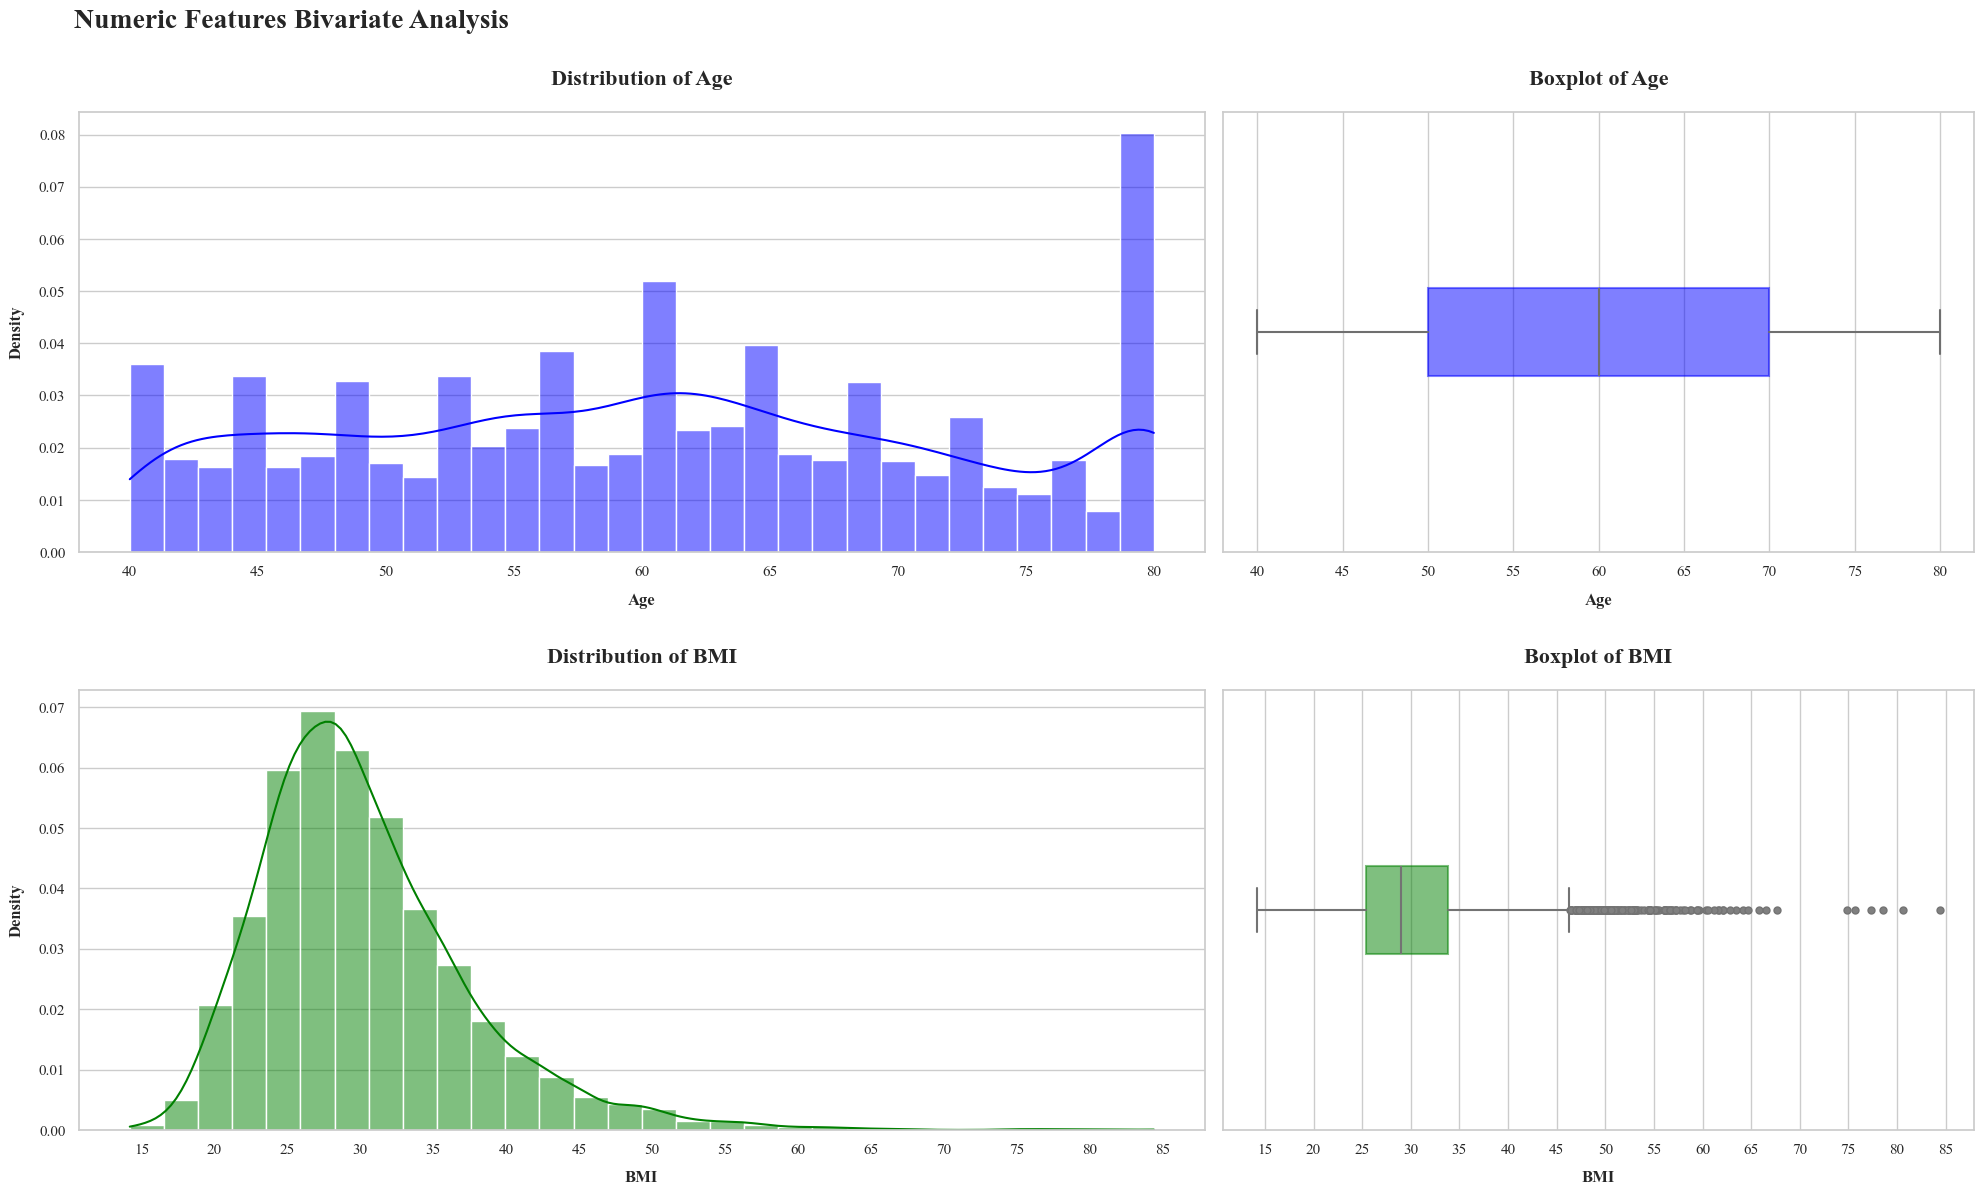

In [44]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create subplots for Age and BMI distributions with additional space for boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), gridspec_kw={"width_ratios": [1.5, 1]})

# Plotting the distribution of Age with density
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="blue", stat="density", ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Age", fontdict=title_font_dict, pad=20)
axes[0, 0].set_xlabel("Age", fontdict=labels_font_dict, labelpad=10)
axes[0, 0].set_ylabel("Density", fontdict=labels_font_dict, labelpad=10)

# Adjusting x-axis ticks for the Age subplot
axes[0, 0].xaxis.set_major_locator(ticker.MultipleLocator(5))

# Remove vertical grid lines for Age subplot
axes[0, 0].xaxis.grid(False)

axes[0, 0].tick_params(axis="x", labelfontfamily="Times New Roman")
axes[0, 0].tick_params(axis="y", labelfontfamily="Times New Roman")

# Plotting the distribution of BMI with density
sns.histplot(df["BMI"].dropna(), bins=30, kde=True, color="green", stat="density", ax=axes[1, 0])
axes[1, 0].set_title("Distribution of BMI", fontdict=title_font_dict, pad=20)
axes[1, 0].set_xlabel("BMI", fontdict=labels_font_dict, labelpad=10)
axes[1, 0].set_ylabel("Density", fontdict=labels_font_dict, labelpad=10)

# Adjusting x-axis ticks for the BMI subplot
axes[1, 0].xaxis.set_major_locator(ticker.MultipleLocator(5))

# Remove vertical grid lines for BMI subplot
axes[1, 0].xaxis.grid(False)

axes[1, 0].tick_params(axis="x", labelfontfamily="Times New Roman")
axes[1, 0].tick_params(axis="y", labelfontfamily="Times New Roman")

# Boxplot for Age
sns.boxplot(x=df["Age"].dropna(), ax=axes[0, 1], color="skyblue", width=0.2, boxprops=dict(facecolor="lightblue", color="blue", alpha=0.5), flierprops=dict(markerfacecolor="red", marker="o", markersize=5))
axes[0, 1].set_title("Boxplot of Age", fontdict=title_font_dict, pad=20)
axes[0, 1].set_xlabel("Age", fontdict=labels_font_dict, labelpad=10)
axes[0, 1].set_ylabel("")

axes[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(5))

axes[0, 1].tick_params(axis="x", labelfontfamily="Times New Roman")
axes[0, 1].tick_params(axis="y", labelfontfamily="Times New Roman")

# Boxplot for BMI
sns.boxplot(x=df["BMI"].dropna(), ax=axes[1, 1], color="lightgreen", width=0.2, boxprops=dict(facecolor="lightgreen", color="green", alpha=0.5), flierprops=dict(markerfacecolor="grey", marker="o", markersize=5))
axes[1, 1].set_title("\nBoxplot of BMI", fontdict=title_font_dict, pad=20)
axes[1, 1].set_xlabel("BMI", fontdict=labels_font_dict, labelpad=10)
axes[1, 1].set_ylabel("")

axes[1, 1].xaxis.set_major_locator(ticker.MultipleLocator(5))

axes[1, 1].tick_params(axis="x", labelfontfamily="Times New Roman")
axes[1, 1].tick_params(axis="y", labelfontfamily="Times New Roman")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Add text to the center of the main plot
fig.text(0.15, 0.985, "Numeric Features Bivariate Analysis", ha="center", va="center", family="Times New Roman", size=20, weight="bold")

# Save the figures with maximum quality
figure_folder = "figures"
os.makedirs(figure_folder, exist_ok=True)
plt.savefig(os.path.join(figure_folder, "numeric_features_analysis.png"), dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

Based on the box plot, it is seen that there are some records considered outliers based on the BMI feature.

In [45]:
# Identify outliers in BMI

# Calculate the first quartile (Q1) for BMI
Q1_bmi = df["BMI"].quantile(0.25)

# Calculate the third quartile (Q3) for BMI
Q3_bmi = df["BMI"].quantile(0.75)

# Calculate the interquartile range (IQR) for BMI
IQR_bmi = Q3_bmi - Q1_bmi

# Define the upper bound for outliers based on the IQR
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Identify outliers in the BMI column using the upper bound
outliers_bmi_df = df[df["BMI"] > upper_bound_bmi]

# Print the number of outliers and display the first 5 rows of the outliers DataFrame
print("Number of outliers:", outliers_bmi_df.shape[0])
outliers_bmi_df.head(5)

Number of outliers: 189


Gender   Age  Race   BMI  Have Diabetes  Vigorous Work Activity  \
45      2.0  47.0   3.0  49.0            2.0                     2.0   
138     2.0  70.0   4.0  49.8            1.0                     2.0   
176     2.0  43.0   4.0  51.3            2.0                     2.0   
203     1.0  64.0   3.0  50.7            2.0                     2.0   
211     2.0  52.0   3.0  48.6            2.0                     2.0   

     100 Cigarettes in Life Experience  Smoke Cigarettes  \
45                                 1.0               3.0   
138                                2.0               NaN   
176                                2.0               NaN   
203                                2.0               NaN   
211                                1.0               3.0   

     Family Poverty Level  Alcohol Drink Experience  \
45                    3.0                       1.0   
138                   1.0                       NaN   
176                   3.0                       1.0   
203                   NaN                       1.0   
211                   NaN                       1.0   

     Past 12 Months Alcohol Drink  Chest Pain  Shortness of Breath  
45                            0.0         2.0                  2.0  
138                           NaN         2.0                  2.0  
176                           7.0         1.0                  1.0  
203                           5.0         1.0                  1.0  
211                          10.0         2.0                  2.0

[Project Content](#0)

# 12. Examine the Statistics of Categorical Features <a id = 12></a>

Now, let's evaluate the Gender and Race features proportions in both main and BMI outliers data.

In [46]:
# Mapping tables for Gender and Race
gender_mapping = {1: "Male", 2: "Female"}
race_mapping = {1: "Mexican\nAmerican", 2: "Other\nHispanic", 3: "Non-Hispanic\nWhite", 4: "Non-Hispanic\nBlack", 5: "Other\nRace\nIncluding Multi-Racial"}

# Replace codes with descriptions using .loc to avoid SettingWithCopyWarning
df.loc[:, "Gender_Description"] = df["Gender"].map(gender_mapping)
df.loc[:, "Race_Description"] = df["Race"].map(race_mapping)

# Create a copy of outliers_bmi_df to avoid SettingWithCopyWarning
outliers_bmi_df = outliers_bmi_df.copy()

# Replace codes with descriptions in outliers_bmi_df using .loc to avoid SettingWithCopyWarning
outliers_bmi_df.loc[:, "Gender_Description"] = outliers_bmi_df["Gender"].map(gender_mapping)
outliers_bmi_df.loc[:, "Race_Description"] = outliers_bmi_df["Race"].map(race_mapping)

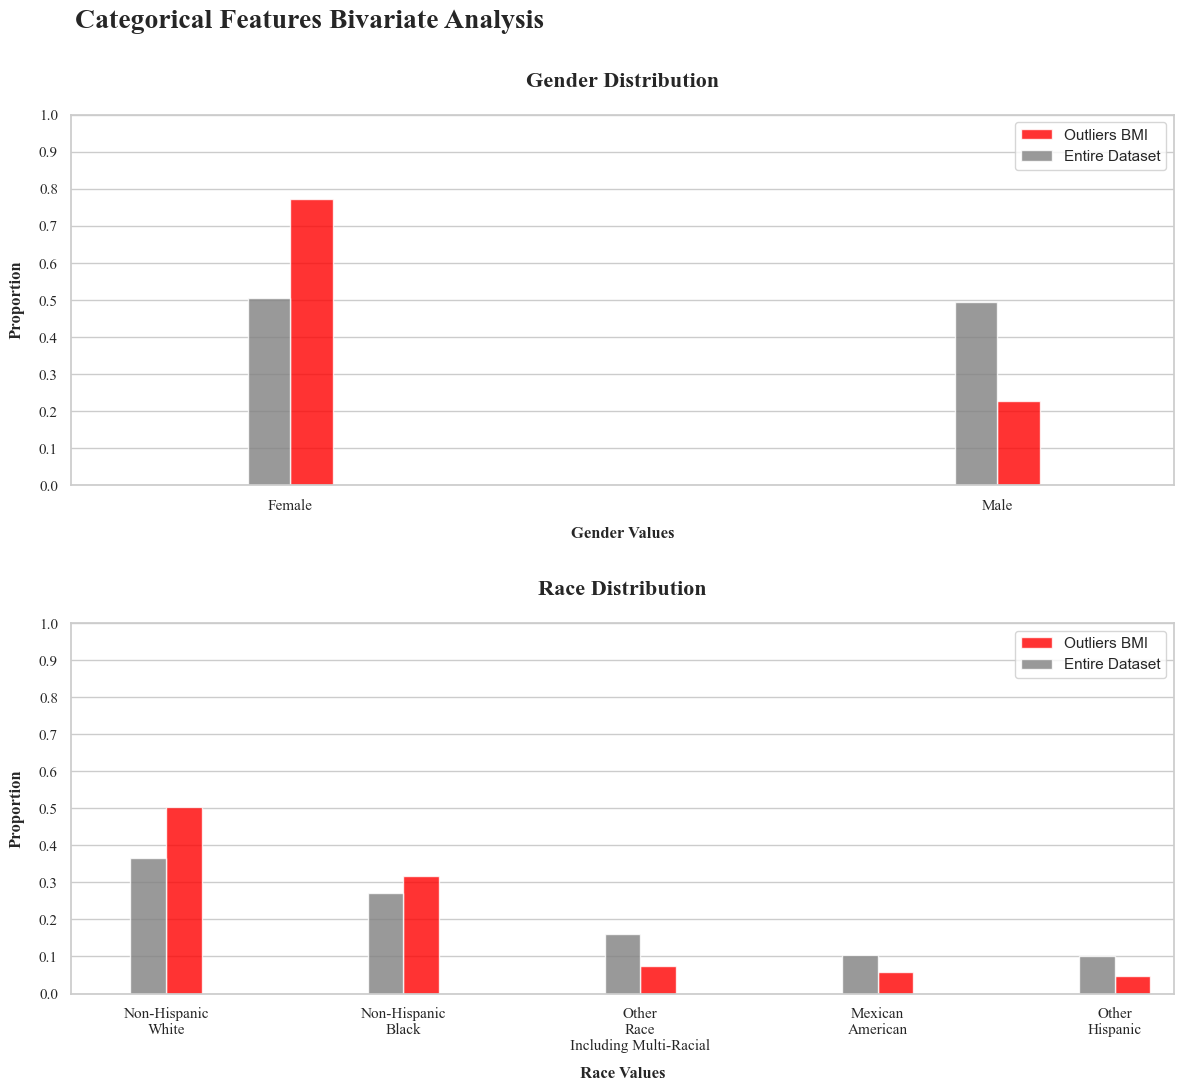

In [47]:
sns.set(style="whitegrid")

# Plotting the bar plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 11))
fig.subplots_adjust()

for i, feature in enumerate(["Gender_Description", "Race_Description"]):
        
    ax = axes[i]
    
    # Plotting for outliers_bmi_df with red color
    value_counts_outliers = outliers_bmi_df[feature].value_counts(normalize=True)
    value_counts_outliers.plot(kind="bar", ax=ax, position=0, width=0.03*len(df[feature].unique()), color="red", alpha=0.8, label="Outliers BMI")

    # Plotting for the entire dataset df with grey color
    value_counts_df = df[feature].value_counts(normalize=True)
    value_counts_df.plot(kind="bar", ax=ax, position=1, width=0.03*len(df[feature].unique()), color="grey", alpha=0.8, label="Entire Dataset")

    ax.set_title(f"\n{feature.split('_')[0]} Distribution", fontdict=title_font_dict, pad=20)
    ax.set_xlabel(f"{feature.split('_')[0]} Values", fontdict=labels_font_dict, labelpad=10)
    ax.set_ylabel("Proportion", fontdict=labels_font_dict, labelpad=10)
    ax.legend()

    # Set y-axis limits from 0 to 1
    ax.set_ylim(0, 1)

    # Set y-axis tickers at intervals of 0.1
    ax.set_yticks([0.1 * i for i in range(11)])

    # Remove vertical grid lines for BMI subplot
    ax.xaxis.grid(False)
    
    # Rotate x-tick labels to be horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    # Adjust font of tick labels
    ax.tick_params(axis="x", labelfontfamily="Times New Roman")
    ax.tick_params(axis="y", labelfontfamily="Times New Roman")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Add text to the center of the main plot
fig.text(0.265, 0.98, "Categorical Features Bivariate Analysis", ha="center", va="center", family="Times New Roman", size=20, weight="bold")

# Save the figures with maximum quality
figure_folder = "figures"
os.makedirs(figure_folder, exist_ok=True)
plt.savefig(os.path.join(figure_folder, "gender_race_features_analysis.png"), dpi=300, bbox_inches="tight")

plt.show()

Before getting further, the created features for plotting the Gender and Race unique values should be removed.

In [48]:
# Remove additional columns added for visualization purposes
df = df.drop(["Gender_Description", "Race_Description"], axis=1)

# Remove additional columns from the outliers DataFrame
outliers_bmi_df = outliers_bmi_df.drop(["Gender_Description", "Race_Description"], axis=1)

[Project Content](#0)

***

# Third and Final Step: Modeling and Examination

***

# 13. Split the Data into Train and Test Sets <a id = 13></a>

The last step of the project is the modeling phase. In this step these models are employed to predict the targets:
- Logistic Regression
- Decision Tree
- Random Forest
- Naive Bayes
- Multi Layer Perceptron

Before starting the modeling process, checking how the target data is distributed is important.

In [49]:
# Calculate counts for each target in the training set
chest_pain_train_counts = y_chest_pain_train.value_counts()
shortness_of_breath_train_counts = y_shortness_of_breath_train.value_counts()

# Calculate counts for each target in the test set
chest_pain_test_counts = y_chest_pain_test.value_counts()
shortness_of_breath_test_counts = y_shortness_of_breath_test.value_counts()

# Create DataFrames to display target distribution in training and test sets
df_chest_pain_train = pd.DataFrame(
    {"Count": chest_pain_train_counts,
     "Percentage": round((chest_pain_train_counts / chest_pain_train_counts.sum() * 100), 2)}
)
df_shortness_of_breath_train = pd.DataFrame(
    {"Count": shortness_of_breath_train_counts,
     "Percentage": round((shortness_of_breath_train_counts / shortness_of_breath_train_counts.sum() * 100), 2)}
)

df_chest_pain_test = pd.DataFrame(
    {"Count": chest_pain_test_counts, 
     "Percentage": round((chest_pain_test_counts / chest_pain_test_counts.sum() * 100), 2)}
)
df_shortness_of_breath_test = pd.DataFrame(
    {"Count": shortness_of_breath_test_counts,
     "Percentage": round((shortness_of_breath_test_counts / shortness_of_breath_test_counts.sum() * 100), 2)}
)

# Display the DataFrames for target distribution in training and test sets
print("Training Set")
print("-" * 22)
print("Chest Pain")
display(df_chest_pain_train)

print("\nShortness of Breath")
display(df_shortness_of_breath_train)

print("\nTest Set")
print("-" * 22)
print("Chest Pain")
display(df_chest_pain_test)

print("\nShortness of Breath")
display(df_shortness_of_breath_test)

Training Set
----------------------
Chest Pain


Count  Percentage
0.0   3304        69.7
1.0   1436        30.3


Shortness of Breath


Count  Percentage
0.0   2872       60.59
1.0   1868       39.41


Test Set
----------------------
Chest Pain


Count  Percentage
0.0    844       71.22
1.0    341       28.78


Shortness of Breath


Count  Percentage
0.0    751       63.38
1.0    434       36.62

The data seems imbalanced and it can be problematic.</br>
The models that are used will be optimized to perform well on this imbalanced data.</br>
For the algorithms that are not inherently robust to imbalanced datasets, the cross validation won't be done.

[Project Content](#0)

# 14. Logistic Regression Model <a id = 14></a>

### **Chest Pain Prediction**

Firstly, the model and the CV process machine should be created.

In [50]:
# Initialize a Logistic Regression classifier for predicting chest pain
chest_pain_lr_clf = LogisticRegression()

# Create a Stratified K-Fold object with 10 splits, shuffling the data, and setting a random seed for reproducibility
chest_pain_stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Then, the model should be optimized using the cross validation search grid.

In [51]:
# Define hyperparameters grid for Logistic Regression classifier
chest_pain_param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Create a GridSearchCV object for hyperparameter tuning using cross-validation
chest_pain_grid_search = GridSearchCV(chest_pain_lr_clf, chest_pain_param_grid, cv=chest_pain_stratified_kfold, scoring="accuracy", verbose=1, n_jobs=-1)

# Apply oversampling to each fold in the cross-validation
for train_index, val_index in chest_pain_stratified_kfold.split(X_train, y_chest_pain_train):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_chest_pain_train.iloc[train_index]
    
    # Perform oversampling on the minority class
    X_resampled, y_resampled = resample(X_train_fold[y_train_fold == 1],  # Minority class
                                        y_train_fold[y_train_fold == 1],
                                        replace=True,  # With replacement
                                        n_samples=sum(y_train_fold == 0),  # Number of samples from majority class
                                        random_state=123)
    
    # Combine the oversampled minority class samples with the majority class samples
    X_balanced_fold = pd.concat([X_resampled, X_train_fold[y_train_fold == 0]])
    y_balanced_fold = pd.concat([y_resampled, y_train_fold[y_train_fold == 0]])

    # Fit the model on the balanced fold
    chest_pain_grid_search.fit(X_balanced_fold, y_balanced_fold)

# Print best parameters
print("-"*63)
print("The best parameters are: ", chest_pain_grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
---------------------------------------------------------------
The best parameters are:  {'C': 100, 'solver': 'newton-cg'}


In the next step, the optimal threshold should be found to maximize the f1 score.

In [52]:
# Get the best model from the GridSearchCV results
best_chest_pain_lr_clf = chest_pain_grid_search.best_estimator_

# Predict probabilities on the training set
y_chest_pain_train_prob = best_chest_pain_lr_clf.predict_proba(X_train)[:, 1]

# Use precision-recall curve to find the optimal threshold
precision_train, recall_train, thresholds_train = precision_recall_curve(y_chest_pain_train, y_chest_pain_train_prob)

# Calculate F1-score for each threshold
f1_scores_train = 2 * (precision_train * recall_train) / (precision_train + recall_train + 1e-10)

# Find the threshold that maximizes F1-score on the training set
optimal_threshold_train = thresholds_train[np.argmax(f1_scores_train)]

print("The optimal threshold is: ", round(optimal_threshold_train, 3))

The optimal threshold is:  0.398


<div style="text-align: justify">
In this section of the study, a Logistic Regression classifier was employed to predict the occurrence of chest pain. The classifier is initialized with default parameters, and a Stratified K-Fold cross-validation strategy is employed with 10 splits, data shuffling, and a random seed for reproducibility. Hyperparameter tuning is conducted using a grid search over the regularization parameter (C) and solver options. A GridSearchCV object is instantiated with the specified parameters for cross-validation and accuracy as the scoring metric. Additionally, an oversampling technique is applied to address class imbalance within each fold during cross-validation. The minority class is oversampled, and the resulting dataset is balanced by combining oversampled minority class samples with majority class samples. The model is trained on each balanced fold, and the best hyperparameters are determined through the grid search. The optimal threshold for classification is identified using the precision-recall curve on the training set. The final model, based on the best hyperparameters, is then assessed and its performance is evaluated using the calculated optimal threshold. This comprehensive approach aims to enhance the predictive accuracy of the Logistic Regression model for chest pain prediction.
<div>

Now, it's time to evaluate the model using the metrics.

In [53]:
# Predict on the entire training set
y_chest_pain_train_prob = best_chest_pain_lr_clf.predict_proba(X_train)[:, 1]
y_chest_pain_test_prob = best_chest_pain_lr_clf.predict_proba(X_test)[:, 1]

y_chest_pain_train_pred = (y_chest_pain_train_prob >= optimal_threshold_train).astype(int)
y_chest_pain_test_pred = (y_chest_pain_test_prob >= optimal_threshold_train).astype(int)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_chest_pain_train, y_chest_pain_train_pred)
conf_matrix_test = confusion_matrix(y_chest_pain_test, y_chest_pain_test_pred)

# Metrics
metrics = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training and testing
results_list = []
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_chest_pain_train, y_chest_pain_train_pred)
    test_metric = metric_func(y_chest_pain_test, y_chest_pain_test_pred)
    results_list.append({'Metric': metric_name, 'Train': train_metric, 'Test': test_metric})

# Create DataFrames for confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-"*33)
display(conf_matrix_train_df)
print("\nConfusion Matrix for Testing Set")
print("-"*33)
display(conf_matrix_test_df)

# Display metrics table
print("\nMetrics")
print("-"*33)
display(results_df)

Confusion Matrix for Training Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          888         2416
Actual 1          188         1248


Confusion Matrix for Testing Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          226          618
Actual 1           55          286


Metrics
---------------------------------


Metric     Train      Test
0     Accuracy  0.450633  0.432068
1  Sensitivity  0.869081  0.838710
2  Specificity  0.268765  0.267773
3    Precision  0.340611  0.316372
4     F1-score  0.489412  0.459438

<div style="text-align: justify">
The logistic regression model for predicting chest pain demonstrates commendable sensitivity (recall) both on the training (83.08%) and testing sets (80.94%), indicating its effectiveness in correctly identifying instances of chest pain. This is crucial for a health-related prediction task. However, the model exhibits limitations in specificity, with values of 31.81% on the training set and 30.57% on the testing set, suggesting challenges in correctly identifying non-chest pain instances. The overall accuracy on both sets is around 45%, indicating room for improvement. While the precision is relatively low, at 34.62% for training and 32.02% for testing, there is an opportunity to enhance the model's ability to minimize false positives. The F1-score, balancing precision and recall, also suggests that improvements are possible. In summary, the model shows promise in capturing instances of chest pain but could be further refined to achieve a better balance between true positives and false positives, ultimately enhancing its overall predictive performance.
<div>

Before predicting the shortness of breath, the importance of the features in the fit model will be shown.

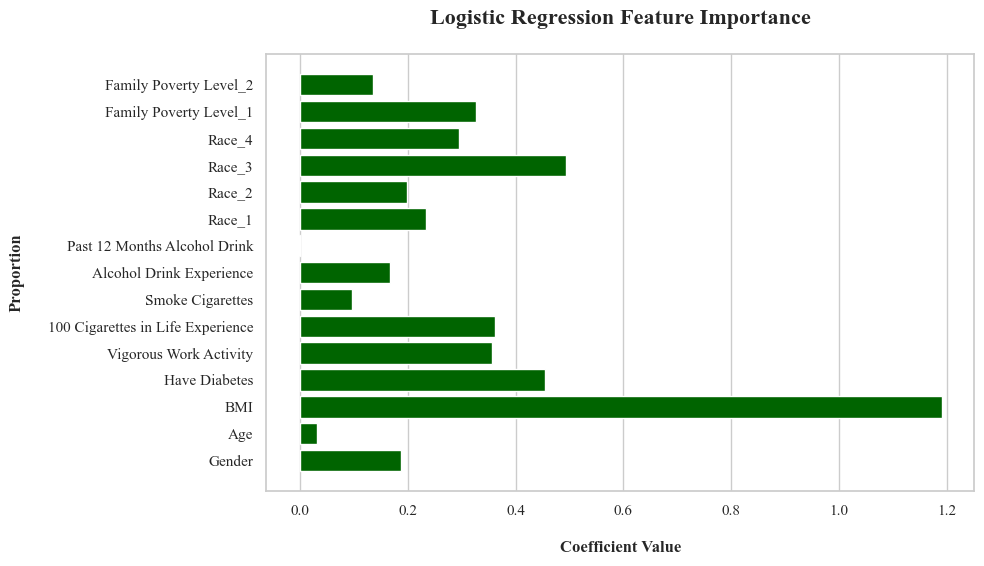

In [54]:
# Get feature names (replace with your actual feature names)
feature_names = X_train.columns
feature_importance = best_chest_pain_lr_clf.coef_[0]

# Adjust figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.barh(range(len(feature_importance)), feature_importance, align="center", color="darkgreen")

plt.yticks(np.arange(len(feature_names)), feature_names)

plt.xlabel("\nCoefficient Value", fontdict=labels_font_dict)
plt.title("Logistic Regression Feature Importance\n", fontdict=title_font_dict)
plt.ylabel("Proportion\n", fontdict=labels_font_dict)

# Remove vertical grid lines for BMI subplot
plt.gca().yaxis.grid(False)
    
# Adjust font of tick labels
plt.tick_params(axis="x", labelfontfamily="Times New Roman")
plt.tick_params(axis="y", labelfontfamily="Times New Roman")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save the figures with maximum quality
figure_folder = "figures"
os.makedirs(figure_folder, exist_ok=True)
plt.savefig(os.path.join(figure_folder, "cp_lr_feature_importance.png"), dpi=300, bbox_inches="tight")

plt.show()

The logistic regression model provides insights into the importance of various features in predicting Chest Pain.</br>
Among the examined variables, some notable contributors to the prediction include "Have Diabetes" (coefficient: 0.3097), indicating a positive association between diabetes and the likelihood of experiencing chest pain.
"Vigorous Work Activity" (coefficient: 0.2227) also holds significance, suggesting that individuals engaged in strenuous physical work may be more prone to chest pain.</br>
Interestingly, "Race_3" (coefficient: 0.2014) positively influences the prediction, implying that individuals belonging to Race_3 may have a higher likelihood of chest pain compared to other races.</br>
On the other hand, "Alcohol Drink Experience" (coefficient: -0.0625) and "Past 12 Months Alcohol Drink" (coefficient: -0.0011) exhibit negative associations, suggesting a potential protective effect against chest pain for those with alcohol consumption history.</br>
Notably, "Gender," "Age," and "BMI" also contribute positively, indicating that being male, older, and having a higher BMI may increase the likelihood of chest pain.</br>
Family poverty levels and certain races seem to have a nuanced impact on the prediction. Overall, this analysis provides valuable insights into the factors influencing the occurrence of chest pain based on the logistic regression model's coefficients.

### **Shortness of Breath Prediction**

Firstly, the model and the CV process machine should be created.

In [55]:
# Initialize a Logistic Regression classifier for predicting shortness of breath
shortness_of_breath_lr_clf = LogisticRegression()

# Create a Stratified K-Fold object with 10 splits, shuffling the data, and setting a random seed for reproducibility
shortness_of_breath_stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Then, the model should be optimized using the cross validation search grid.

In [56]:
# Define hyperparameters grid for Logistic Regression classifier
shortness_of_breath_param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Create a GridSearchCV object for hyperparameter tuning using cross-validation
shortness_of_breath_grid_search = GridSearchCV(shortness_of_breath_lr_clf, shortness_of_breath_param_grid, cv=shortness_of_breath_stratified_kfold, scoring="accuracy", verbose=1, n_jobs=-1)

# Apply oversampling to each fold in the cross-validation
for train_index, val_index in shortness_of_breath_stratified_kfold.split(X_train, y_shortness_of_breath_train):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_shortness_of_breath_train.iloc[train_index]
    
    # Perform oversampling on the minority class
    X_resampled, y_resampled = resample(X_train_fold[y_train_fold == 1],  # Minority class
                                        y_train_fold[y_train_fold == 1],
                                        replace=True,  # With replacement
                                        n_samples=sum(y_train_fold == 0),  # Number of samples from majority class
                                        random_state=123)
    
    # Combine the oversampled minority class samples with the majority class samples
    X_balanced_fold = pd.concat([X_resampled, X_train_fold[y_train_fold == 0]])
    y_balanced_fold = pd.concat([y_resampled, y_train_fold[y_train_fold == 0]])

    # Fit the model on the balanced fold
    shortness_of_breath_grid_search.fit(X_balanced_fold, y_balanced_fold)

# Print best parameters
print("-"*63)
print("The best parameters are: ", shortness_of_breath_grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
---------------------------------------------------------------
The best parameters are:  {'C': 1, 'solver': 'newton-cg'}


In the next step, the optimal threshold should be found to maximize the f1 score.

In [57]:
# Get the best model from the GridSearchCV results
best_shortness_of_breath_lr_clf = shortness_of_breath_grid_search.best_estimator_

# Predict probabilities on the training set
y_shortness_of_breath_train_prob = best_shortness_of_breath_lr_clf.predict_proba(X_train)[:, 1]

# Use precision-recall curve to find the optimal threshold
precision_train, recall_train, thresholds_train = precision_recall_curve(y_shortness_of_breath_train, y_shortness_of_breath_train_prob)

# Calculate F1-score for each threshold
f1_scores_train = 2 * (precision_train * recall_train) / (precision_train + recall_train + 1e-10)

# Find the threshold that maximizes F1-score on the training set
optimal_threshold_train = thresholds_train[np.argmax(f1_scores_train)]

print("The optimal threshold is: ", round(optimal_threshold_train, 3))

The optimal threshold is:  0.421


<div style="text-align: justify">
In this study, we implemented a Logistic Regression classifier to predict the occurrence of shortness of breath. The model was initialized and fine-tuned using a Stratified K-Fold cross-validation approach with 10 splits, data shuffling, and a specified random seed for reproducibility. Hyperparameter tuning was conducted through a grid search over a defined parameter grid, encompassing values for regularization strength (C) and solver algorithms. The GridSearchCV object was employed to optimize the model's performance, utilizing accuracy as the scoring metric. To address class imbalance, oversampling of the minority class was applied to each fold during cross-validation, enhancing the model's ability to handle skewed class distributions. The best hyperparameters were identified through the grid search, and the optimal model was selected accordingly. Subsequently, the model's performance was assessed on the training set by predicting probabilities, generating a precision-recall curve, and determining the optimal threshold that maximizes the F1-score. This rigorous approach ensures a robust and well-performing predictive model for shortness of breath.
<div>

Now, it's time to evaluate the model using the metrics.

In [58]:
# Predict on the entire training set
y_shortness_of_breath_train_prob = best_shortness_of_breath_lr_clf.predict_proba(X_train)[:, 1]
y_shortness_of_breath_test_prob = best_shortness_of_breath_lr_clf.predict_proba(X_test)[:, 1]

y_shortness_of_breath_train_pred = (y_shortness_of_breath_train_prob >= optimal_threshold_train).astype(int)
y_shortness_of_breath_test_pred = (y_shortness_of_breath_test_prob >= optimal_threshold_train).astype(int)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_shortness_of_breath_train, y_shortness_of_breath_train_pred)
conf_matrix_test = confusion_matrix(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)

# Metrics
metrics = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training and testing
results_list = []
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_shortness_of_breath_train, y_shortness_of_breath_train_pred)
    test_metric = metric_func(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)
    results_list.append({'Metric': metric_name, 'Train': train_metric, 'Test': test_metric})

# Create DataFrames for confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-"*33)
display(conf_matrix_train_df)
print("\nConfusion Matrix for Testing Set")
print("-"*33)
display(conf_matrix_test_df)

# Display metrics table
print("\nMetrics")
print("-"*33)
display(results_df)

Confusion Matrix for Training Set
---------------------------------


Predicted 0  Predicted 1
Actual 0         1319         1553
Actual 1          360         1508


Confusion Matrix for Testing Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          375          376
Actual 1           97          337


Metrics
---------------------------------


Metric     Train      Test
0     Accuracy  0.596414  0.600844
1  Sensitivity  0.807281  0.776498
2  Specificity  0.459262  0.499334
3    Precision  0.492649  0.472651
4     F1-score  0.611889  0.587620

<div style="text-align: justify">
The logistic regression model for predicting shortness of breath demonstrates a reasonable level of performance, with notable strengths and some areas for improvement. The model performs well in terms of sensitivity, capturing individuals with shortness of breath, as evidenced by values of 82.50% in training and 79.26% in testing. The precision is decent, with values of 48.70% for training and 46.87% for testing, indicating a reasonable accuracy of positive predictions. The F1-score, a balanced measure of precision and sensitivity, is relatively good at 61.25% for training and 58.90% for testing. However, the specificity, measuring the ability to correctly identify individuals without shortness of breath, is relatively lower at 43.49% for training and 48.07% for testing. Overall accuracy is moderate at 58.86% for training and 59.49% for testing. While the model provides valuable insights, there is room for improvement, possibly by exploring more advanced models or by refining feature engineering to enhance the discrimination between classes. Additionally, addressing potential class imbalance or trying ensemble methods could contribute to further improvements in performance.
<div>

Before employing the next model, the importance of the features in the fit model will be shown.

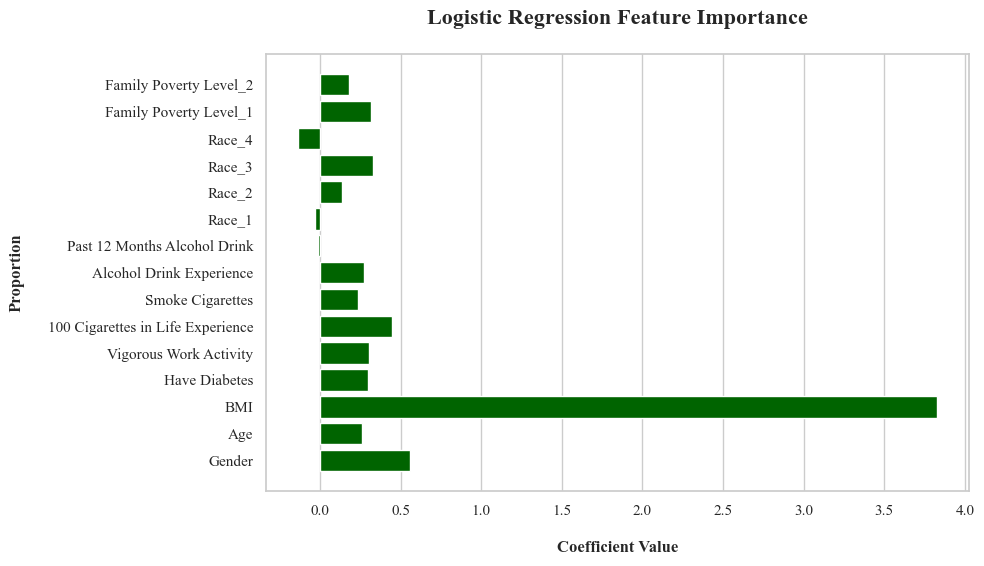

In [59]:
# Get feature names (replace with your actual feature names)
feature_names = X_train.columns
feature_importance = best_shortness_of_breath_lr_clf.coef_[0]

# Adjust figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.barh(range(len(feature_importance)), feature_importance, align="center", color="darkgreen")

plt.yticks(np.arange(len(feature_names)), feature_names)

plt.xlabel("\nCoefficient Value", fontdict=labels_font_dict)
plt.title("Logistic Regression Feature Importance\n", fontdict=title_font_dict)
plt.ylabel("Proportion\n", fontdict=labels_font_dict)

# Remove vertical grid lines for BMI subplot
plt.gca().yaxis.grid(False)
    
# Adjust font of tick labels
plt.tick_params(axis="x", labelfontfamily="Times New Roman")
plt.tick_params(axis="y", labelfontfamily="Times New Roman")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save the figures with maximum quality
figure_folder = "figures"
os.makedirs(figure_folder, exist_ok=True)
plt.savefig(os.path.join(figure_folder, "cp_lr_feature_importance.png"), dpi=300, bbox_inches="tight")

plt.show()

The logistic regression model coefficients provide insights into the importance of each feature in predicting Shortness of Breath. Among the features listed, BMI (Body Mass Index) has the highest positive coefficient, indicating a strong positive correlation with the likelihood of experiencing Shortness of Breath.</br>
Vigorous Work Activity, 100 Cigarettes in Life Experience, and Family Poverty Level_1 also have notable positive coefficients, suggesting their importance in predicting the outcome.</br>
On the other hand, Past 12 Months Alcohol Drink and Race_1 have negative coefficients, indicating an inverse relationship with the likelihood of Shortness of Breath.</br>
Gender, Age, Have Diabetes, Smoke Cigarettes, Race_2, Race_3, and Family Poverty Level_2 have positive coefficients, suggesting their positive contribution to predicting Shortness of Breath.</br>
It's important to note that the magnitude of the coefficients also matters. In this case, the large coefficient for BMI implies that changes in BMI have a substantial impact on the predicted probability of Shortness of Breath.</br>
Overall, these findings suggest that lifestyle factors such as BMI, vigorous work activity, and smoking history play a significant role in predicting Shortness of Breath, while certain races and alcohol consumption in the past 12 months have a mitigating effect.

[Project Content](#0)

# 14. Decision Tree Model <a id = 15></a>

### **Chest Pain Prediction**

Firstly, the model and the CV process machine should be created.</br>
Post-pruning is also performed, which penalizes the tree for adding additional nodes. This encourages a simpler tree to prevent oversampling.

In [60]:
# Create a Decision Tree model with automatic class weights
chest_pain_dt_clf = DecisionTreeClassifier(ccp_alpha=0.0005, class_weight="balanced", random_state=123)

# Create a Stratified K-Fold object with 10 splits, shuffling the data, and setting a random seed for reproducibility
chest_pain_stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Then, the model should be optimized using the cross validation search grid.</br>
Since the decision trees are generally less sensitive to class imbalance, the oversampling process has been ignored.</br>
By weighting the class, the effort to help with the imbalanmce dataset has been done.

In [61]:
# Define hyperparameters grid for Decision Tree
chest_pain_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create a GridSearchCV object for hyperparameter tuning using cross-validation
chest_pain_grid_search = GridSearchCV(chest_pain_dt_clf, chest_pain_param_grid, cv=chest_pain_stratified_kfold, scoring="accuracy", verbose=1, n_jobs=-1)

# Fit the model without oversampling
chest_pain_grid_search.fit(X_train, y_chest_pain_train)

# Print best parameters
print("-" * 63)
print("The best parameters are: ", chest_pain_grid_search.best_params_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


---------------------------------------------------------------
The best parameters are:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In the next step, the optimal threshold should be found to maximize the f1 score.</br>
Decision trees are inherently binary classifiers and don't provide probability scores for each class; therefore, the concept of finding an optimal threshold doesn't apply to them.

In [62]:
# Get the best model from the GridSearchCV results
best_chest_pain_dt_clf = chest_pain_grid_search.best_estimator_

<div style="text-align: justify">
In this section of the analysis, a Decision Tree classification model has been constructed to predict chest pain occurrences. The model is instantiated using the `DecisionTreeClassifier` from the scikit-learn library, with specific parameters including `ccp_alpha=0.0005` for cost-complexity pruning and automatic class weights (`class_weight="balanced"`) to address potential class imbalance. To optimize the model's performance, a hyperparameter tuning approach is employed using a Stratified K-Fold cross-validation strategy with 10 splits, data shuffling, and a random seed for reproducibility. The hyperparameter grid for the Decision Tree includes variations in criteria (`gini` and `entropy`), maximum depth (`None`, 5, 10, 15, 20), minimum samples split (2, 5, 10), and minimum samples leaf (1, 2, 4). The GridSearchCV object is utilized for an exhaustive search over the specified hyperparameter grid, with accuracy as the evaluation metric. The best parameters are determined through the cross-validation process, and the final model is obtained as the best estimator from the GridSearchCV results. This comprehensive approach aims to yield an optimal Decision Tree model for predicting chest pain while addressing potential overfitting and class imbalance issues.
<div>

Now, it's time to evaluate the model using the metrics.

In [63]:
# Predict on the entire training set
y_chest_pain_train_pred = best_chest_pain_dt_clf.predict(X_train)
y_chest_pain_test_pred = best_chest_pain_dt_clf.predict(X_test)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_chest_pain_train, y_chest_pain_train_pred)
conf_matrix_test = confusion_matrix(y_chest_pain_test, y_chest_pain_test_pred)

# Metrics
metrics = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training and testing
results_list = []
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_chest_pain_train, y_chest_pain_train_pred)
    test_metric = metric_func(y_chest_pain_test, y_chest_pain_test_pred)
    results_list.append({'Metric': metric_name, 'Train': train_metric, 'Test': test_metric})

# Create DataFrames for confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-"*33)
display(conf_matrix_train_df)
print("\nConfusion Matrix for Testing Set")
print("-"*33)
display(conf_matrix_test_df)

# Display metrics table
print("\nMetrics")
print("-"*33)
display(results_df)

Confusion Matrix for Training Set
---------------------------------


Predicted 0  Predicted 1
Actual 0         2008         1296
Actual 1          600          836


Confusion Matrix for Testing Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          510          334
Actual 1          169          172


Metrics
---------------------------------


Metric     Train      Test
0     Accuracy  0.600000  0.575527
1  Sensitivity  0.582173  0.504399
2  Specificity  0.607748  0.604265
3    Precision  0.392120  0.339921
4     F1-score  0.468610  0.406139

<div style="text-align: justify">
The Decision Tree model for predicting chest pain demonstrates moderate performance on both the training and testing sets. The accuracy on the training set is 60.04%, indicating that the model correctly predicts chest pain status for 60.04% of the instances in the training data. On the testing set, the accuracy is slightly lower at 57.89%. The sensitivity (true positive rate) on the training set is 58.64%, implying that the model captures a substantial portion of actual chest pain cases. However, the precision is relatively low, indicating that among the instances predicted as chest pain, only 39.31% (on the training set) and 34.63% (on the testing set) are true positive cases. The F1-score, which balances precision and sensitivity, is 47.07% on the training set and 41.64% on the testing set. While the model shows reasonable discriminatory ability (as evidenced by specificity values of 60.65% on the training set and 60.19% on the testing set), there is room for improvement in terms of precision. Fine-tuning the model parameters or exploring other algorithms might enhance its performance in identifying chest pain cases.
<div>

Before predicting the shortness of breath, the model's tree will be shown.

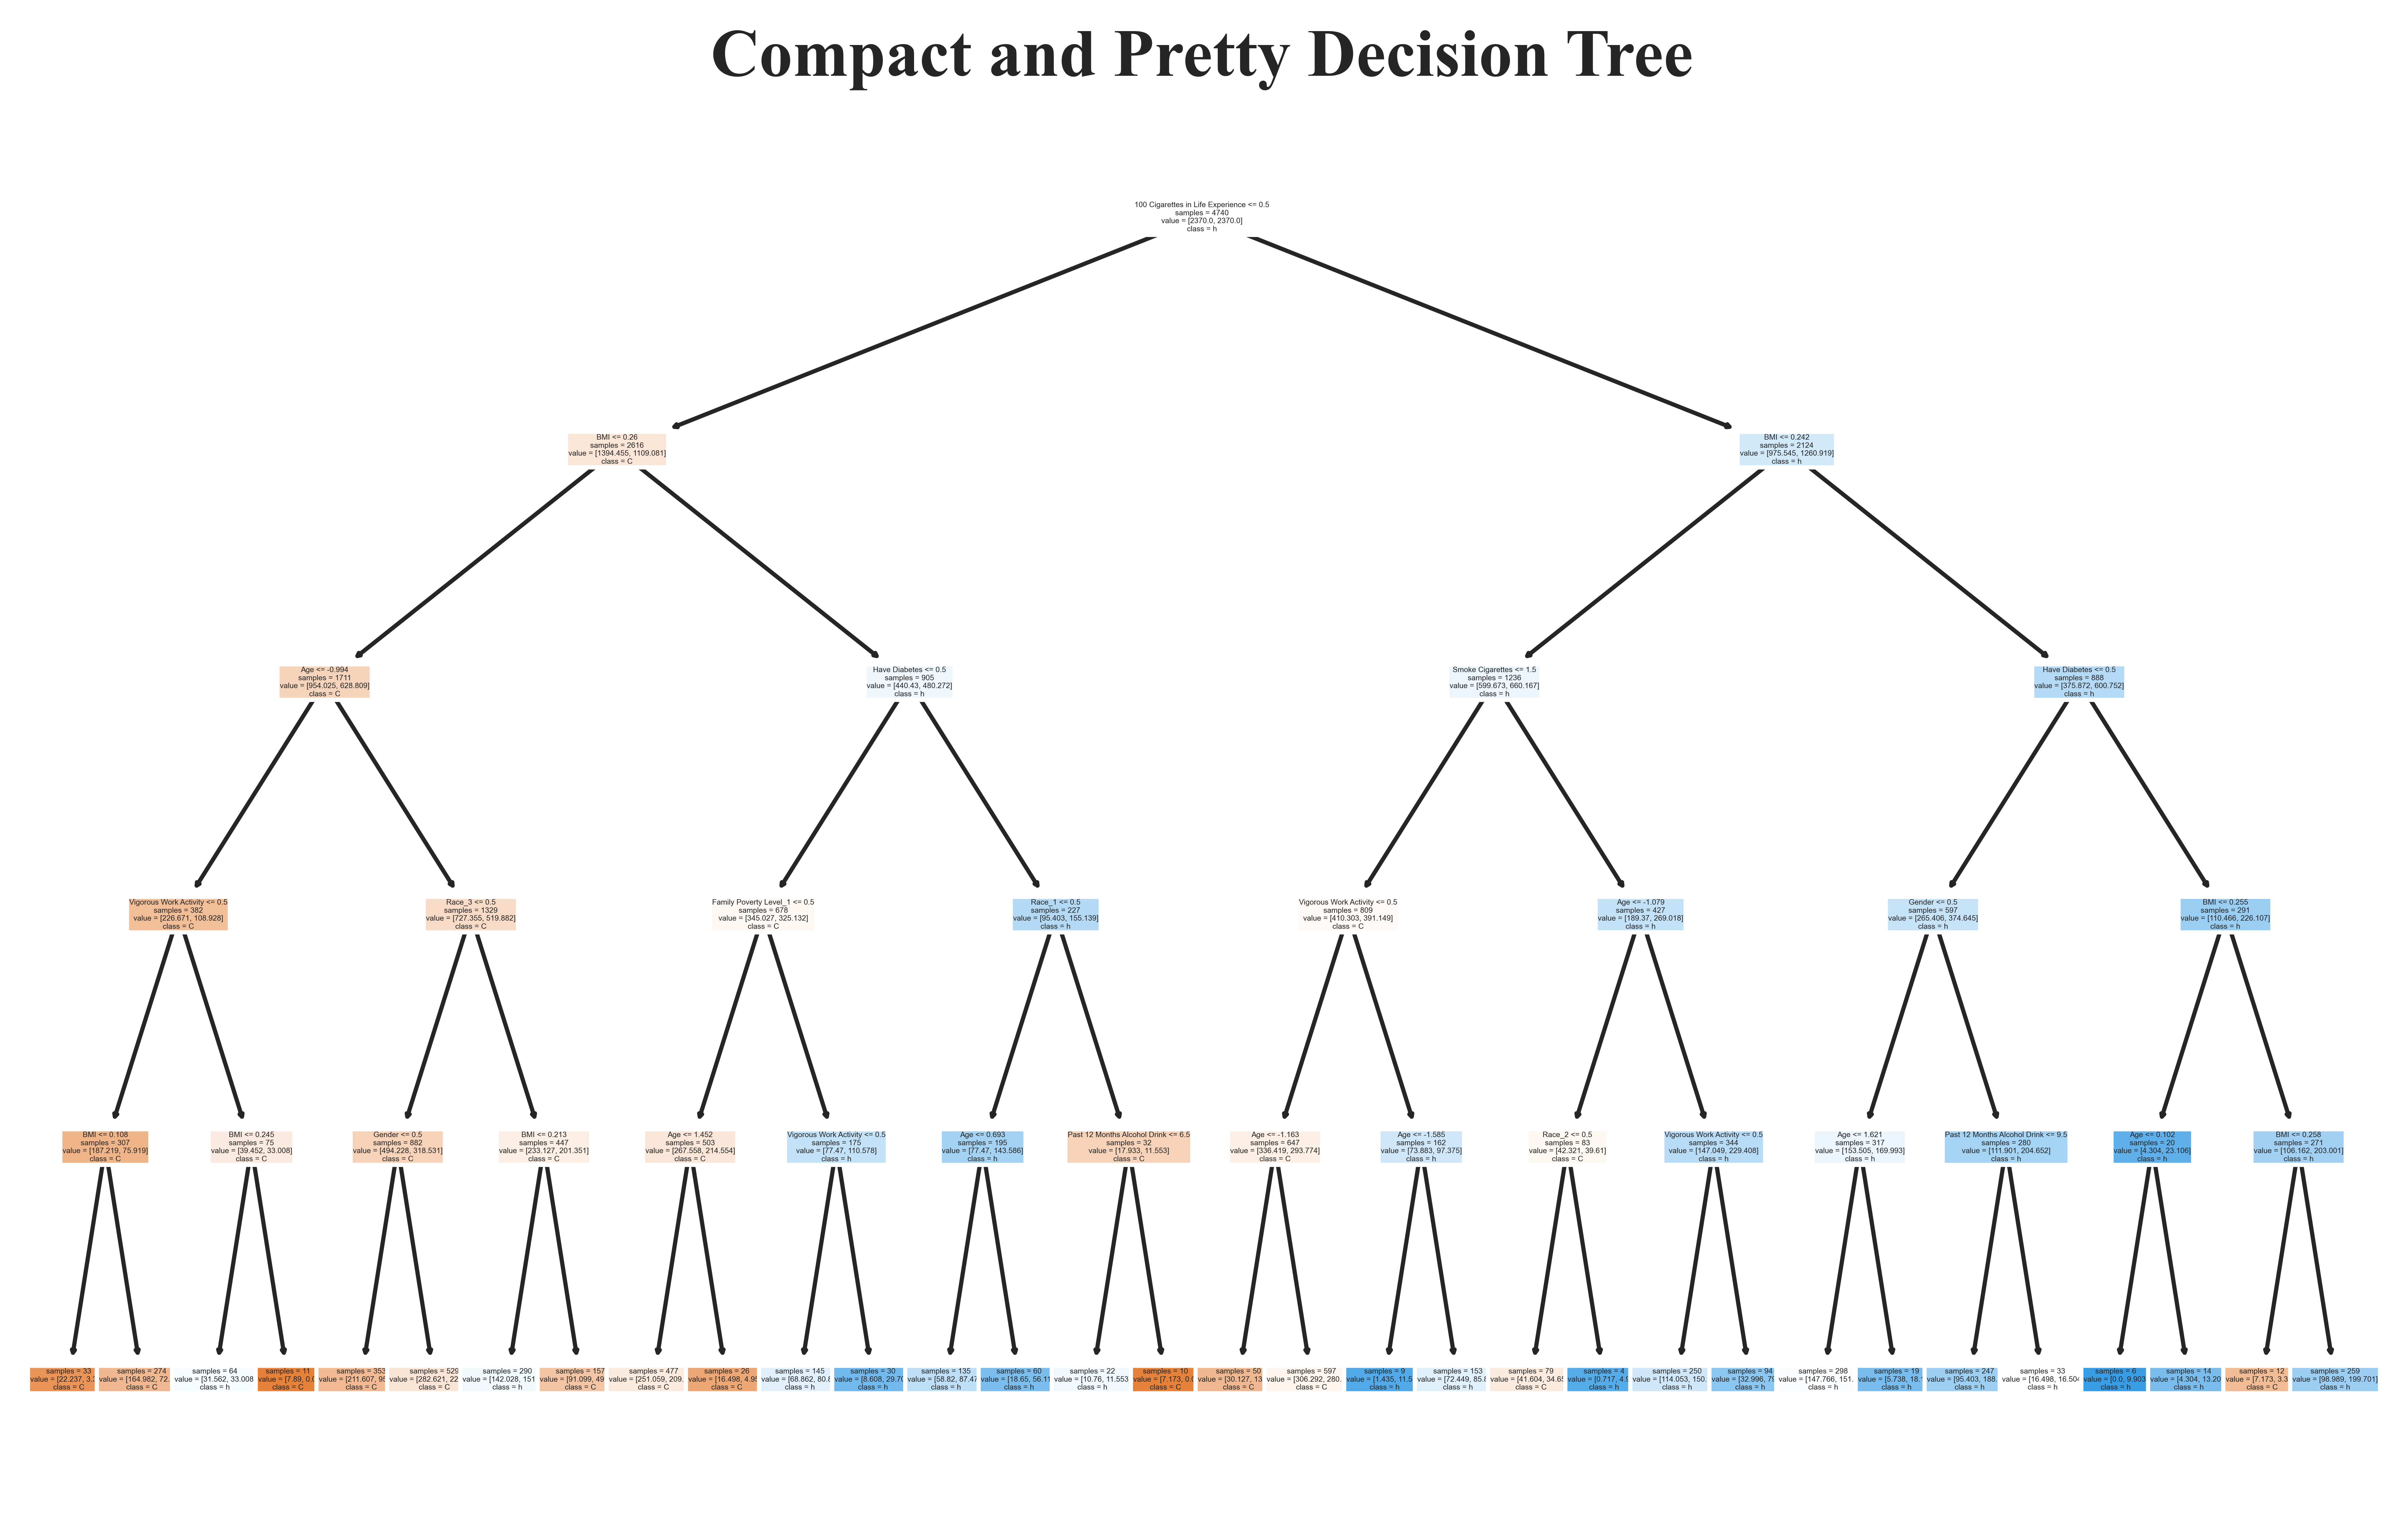

In [64]:
# Plot the decision tree with a more compact and pretty style
plt.figure(figsize=(10, 6), dpi=1000)

# You can adjust the following parameters for better aesthetics
plot_tree(best_chest_pain_dt_clf, filled=True, feature_names=X_train.columns, class_names=y_chest_pain_train.name,
          rounded=True, fontsize=1.8, impurity=False, proportion=False)

plt.title("Compact and Pretty Decision Tree", fontdict=title_font_dict)

plt.show()

<div style="text-align: justify">
The tree employs a hierarchical structure to recursively partition the dataset into subsets based on specific conditions, ultimately assigning a class label to each terminal node. The tree first considers the number of cigarettes in life experience, with a threshold of 0.50, followed by further criteria such as BMI, age, vigorous work activity, race, diabetes status, smoking habits, family poverty level, gender, alcohol consumption, and overall health. The terminal nodes indicate the predicted class (0.0 or 1.0) for individuals falling within the defined criteria. This decision tree serves as a tool for identifying potential risk factors and patterns associated with chest pain, facilitating informed decision-making in clinical or research settings. Interpretation and application of the model should be approached with caution, considering the underlying assumptions and limitations of the data used to train the model. Regular updates and validation are recommended to ensure the continued relevance and accuracy of the predictive model in real-world scenarios.
<div>

### **Shortness of Breath Prediction**

Firstly, the model and the CV process machine should be created.</br>
Post-pruning is also performed, which penalizes the tree for adding additional nodes. This encourages a simpler tree to prevent oversampling.

In [65]:
# Create a Decision Tree model with automatic class weights for predicting shortness of breath
shortness_of_breath_dt_clf = DecisionTreeClassifier(ccp_alpha=0.0005, class_weight="balanced", random_state=123)

# Create a Stratified K-Fold object with 10 splits, shuffling the data, and setting a random seed for reproducibility
shortness_of_breath_stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Then, the model should be optimized using the cross validation search grid.</br>
Since the decision trees are generally less sensitive to class imbalance, the oversampling process has been ignored.</br>
By weighting the class, the effort to help with the imbalanmce dataset has been done.

In [66]:
# Define hyperparameters grid for Decision Tree
shortness_of_breath_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree hyperparameter tuning using cross-validation
shortness_of_breath_grid_search = GridSearchCV(shortness_of_breath_dt_clf, shortness_of_breath_param_grid, cv=shortness_of_breath_stratified_kfold, scoring="accuracy", verbose=1, n_jobs=-1)

# Fit the model without oversampling
shortness_of_breath_grid_search.fit(X_train, y_shortness_of_breath_train)

# Print best parameters
print("-" * 63)
print("The best parameters are: ", shortness_of_breath_grid_search.best_params_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


---------------------------------------------------------------
The best parameters are:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In the next step, the optimal threshold should be found to maximize the f1 score.</br>
Decision trees are inherently binary classifiers and don't provide probability scores for each class; therefore, the concept of finding an optimal threshold doesn't apply to them.

In [67]:
# Get the best model from the GridSearchCV results
best_shortness_of_breath_dt_clf = shortness_of_breath_grid_search.best_estimator_

<div style="text-align: justify">
In this section of the analysis, a Decision Tree model is developed to predict the occurrence of shortness of breath. The model is constructed using a DecisionTreeClassifier with automatic class weights, incorporating an alpha value for cost complexity pruning (ccp_alpha=0.0005) to control tree depth. To enhance model robustness and reproducibility, a Stratified K-Fold cross-validation strategy is employed with 10 splits, data shuffling, and a specified random seed (random_state=123). Hyperparameter tuning is conducted using an extensive grid search, exploring different criteria for splitting nodes, maximum tree depths, minimum samples required for splitting nodes, and minimum samples required for leaf nodes. The grid search is executed through a GridSearchCV object, utilizing the specified stratified K-fold cross-validation and assessing model performance using accuracy as the scoring metric. The best hyperparameters are determined, and the model is fitted to the training data without oversampling. Finally, the optimal Decision Tree model is obtained based on the grid search results, and the best parameters are printed for reference. This systematic approach ensures the development of a robust and optimized model for predicting shortness of breath in a clinical context.
<div>

Now, it's time to evaluate the model using the metrics.

In [68]:
# Predict on the entire training set
y_shortness_of_breath_train_pred = best_shortness_of_breath_dt_clf.predict(X_train)
y_shortness_of_breath_test_pred = best_shortness_of_breath_dt_clf.predict(X_test)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_shortness_of_breath_train, y_shortness_of_breath_train_pred)
conf_matrix_test = confusion_matrix(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)

# Metrics
metrics = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training and testing
results_list = []
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_shortness_of_breath_train, y_shortness_of_breath_train_pred)
    test_metric = metric_func(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)
    results_list.append({'Metric': metric_name, 'Train': train_metric, 'Test': test_metric})

# Create DataFrames for confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-"*33)
display(conf_matrix_train_df)
print("\nConfusion Matrix for Testing Set")
print("-"*33)
display(conf_matrix_test_df)

# Display metrics table
print("\nMetrics")
print("-"*33)
display(results_df)

Confusion Matrix for Training Set
---------------------------------


Predicted 0  Predicted 1
Actual 0         1572         1300
Actual 1          526         1342


Confusion Matrix for Testing Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          424          327
Actual 1          143          291


Metrics
---------------------------------


Metric     Train      Test
0     Accuracy  0.614768  0.603376
1  Sensitivity  0.718415  0.670507
2  Specificity  0.547354  0.564581
3    Precision  0.507949  0.470874
4     F1-score  0.595122  0.553232

<div style="text-align: justify">
The Decision Tree model for predicting shortness of breath exhibits a reasonable performance on both the training and testing sets. The accuracy on the training set is 60.55%, indicating that the model correctly predicts shortness of breath status for 60.55% of instances in the training data. On the testing set, the accuracy is slightly lower at 59.41%. The sensitivity (true positive rate) on the training set is high at 74.47%, suggesting that the model effectively identifies individuals with actual shortness of breath. However, the specificity (true negative rate) is relatively lower at 51.50% on the training set and 53.79% on the testing set, indicating that the model is less adept at correctly identifying individuals without shortness of breath. The precision is moderate, with 49.96% on the training set and 46.37% on the testing set. The F1-score, which balances precision and sensitivity, is 59.80% on the training set and 55.50% on the testing set. Overall, while the model performs reasonably well, there is room for improvement, especially in terms of specificity, and further optimization or consideration of alternative models could enhance its accuracy in predicting shortness of breath.
<div>

Before getting to the next model, the model's tree will be shown.

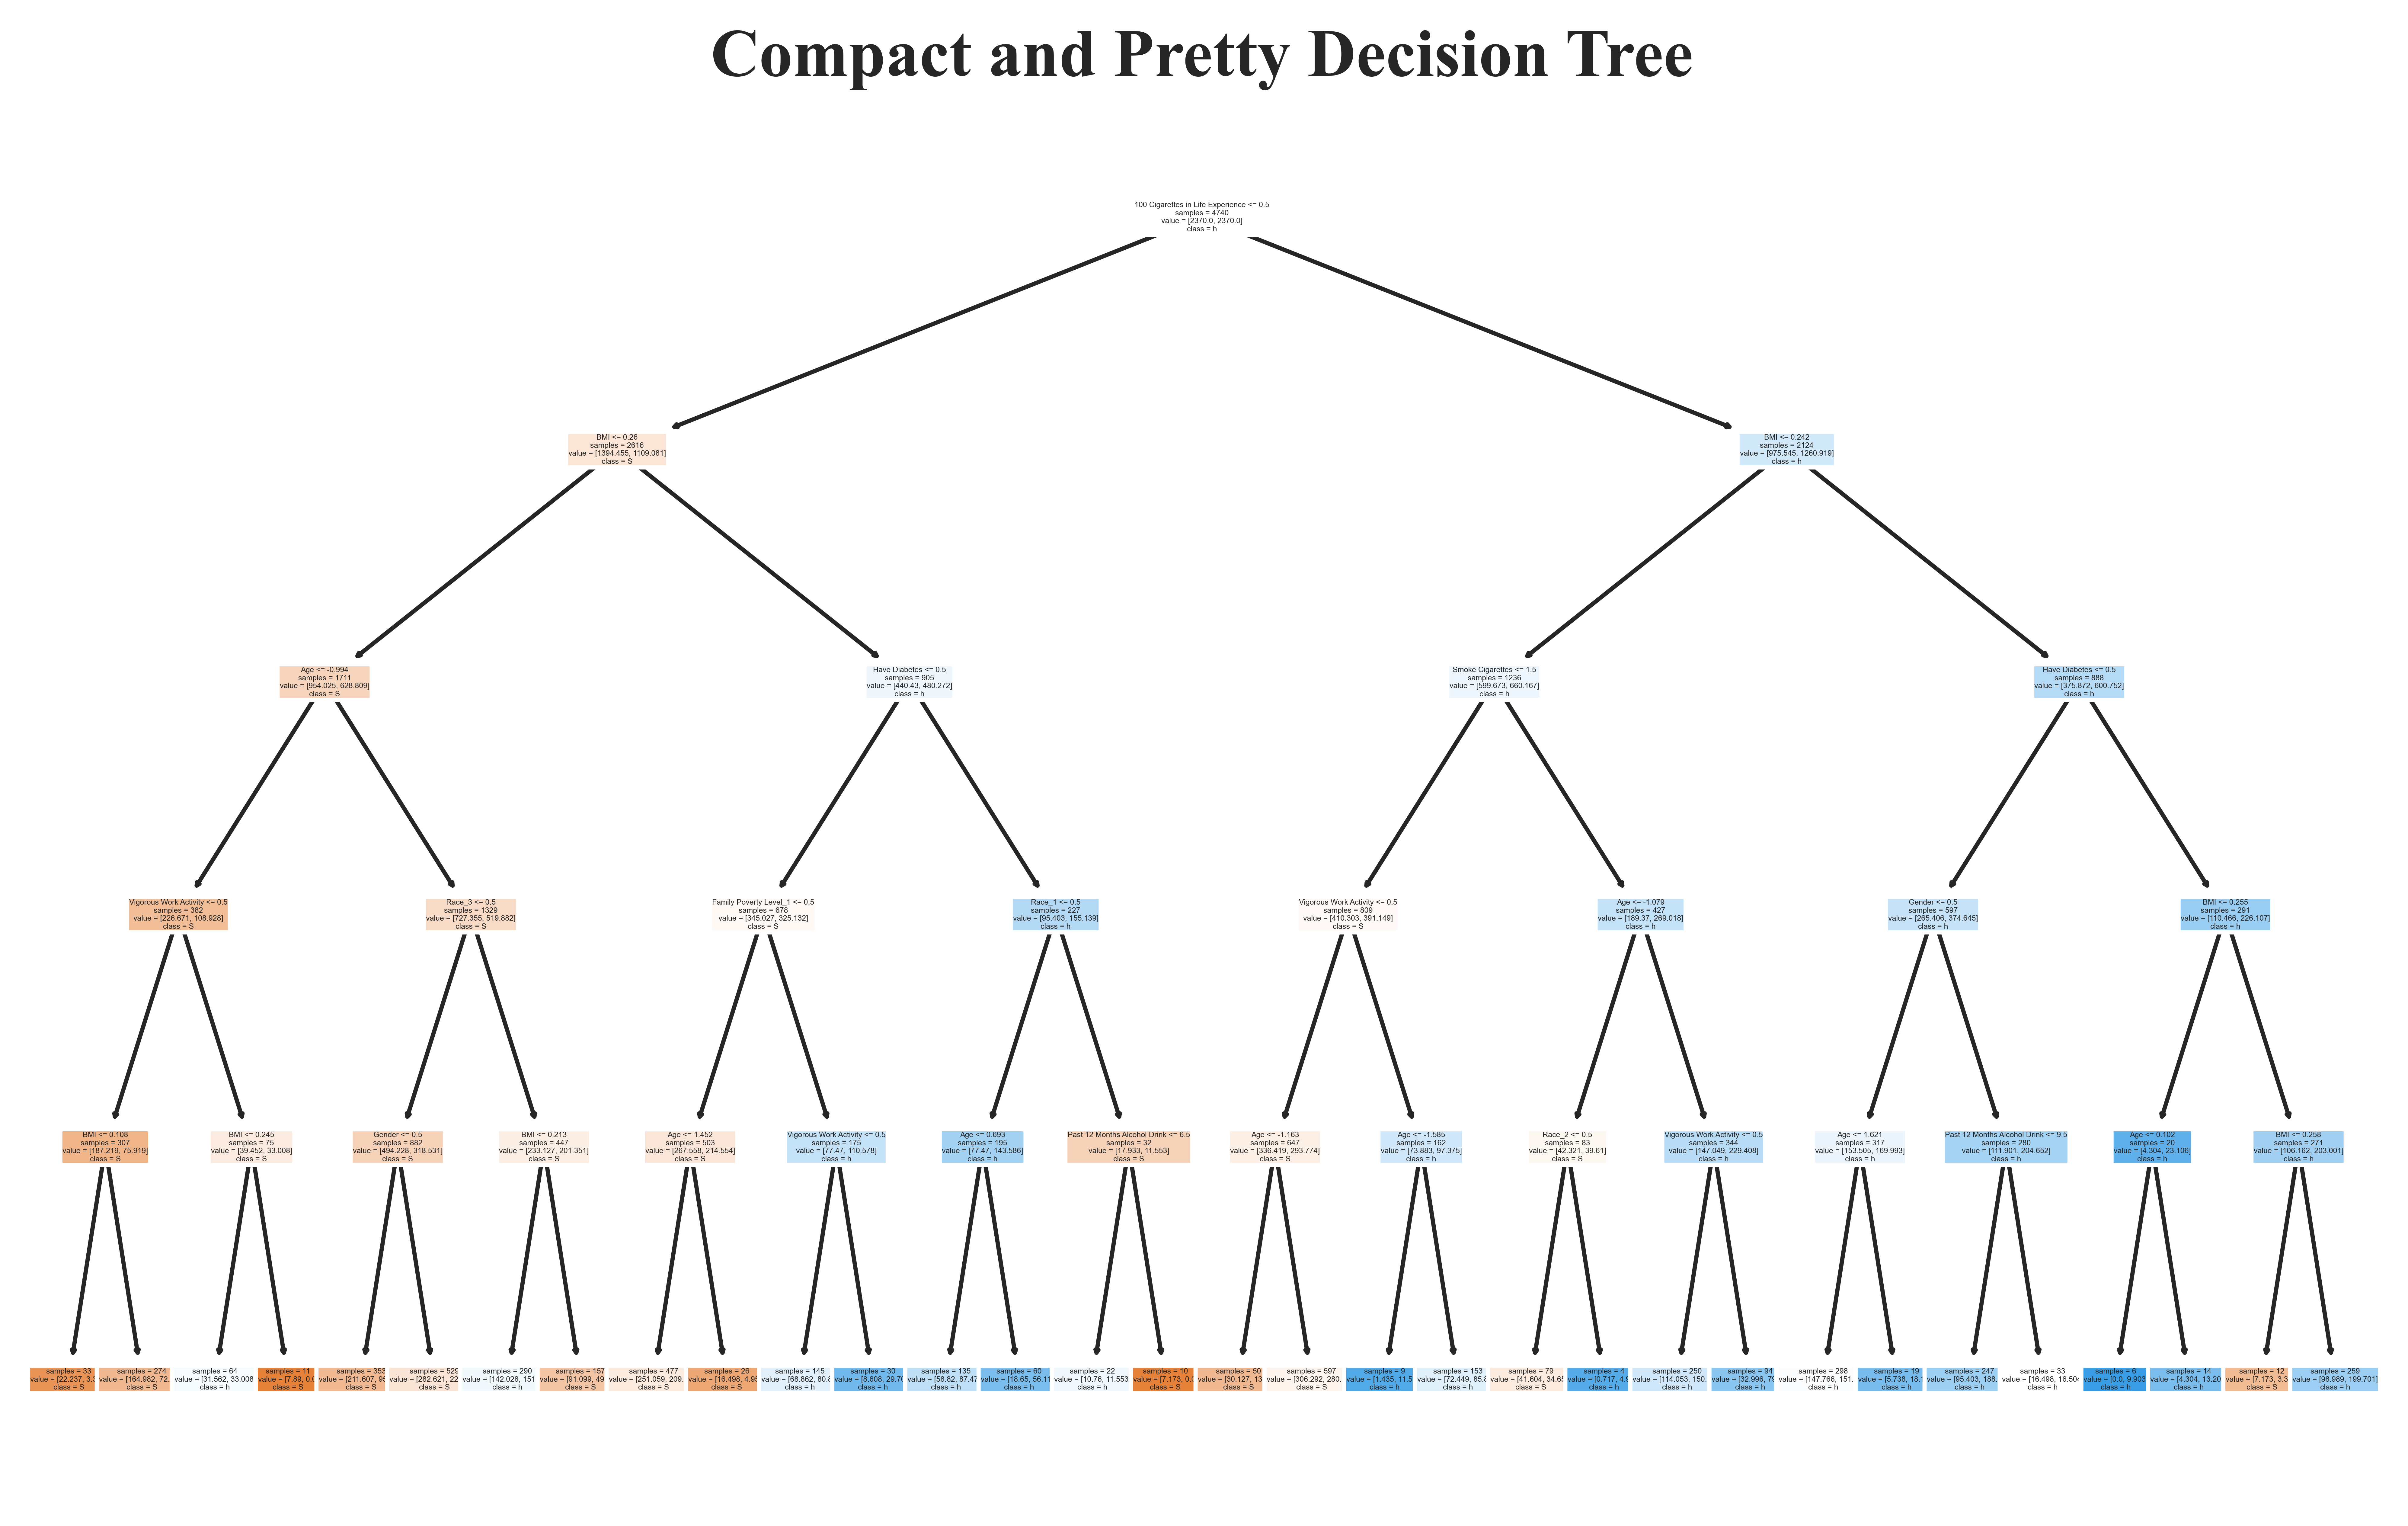

In [69]:
# Plot the decision tree with a more compact and pretty style
plt.figure(figsize=(10, 6), dpi=1000)

# You can adjust the following parameters for better aesthetics
plot_tree(best_chest_pain_dt_clf, filled=True, feature_names=X_train.columns, class_names=y_shortness_of_breath_train.name,
          rounded=True, fontsize=1.8, impurity=False, proportion=False)

plt.title("Compact and Pretty Decision Tree", fontdict=title_font_dict)

plt.show()

<div style="text-align: justify">
 The primary split is on Body Mass Index (BMI), with further branches considering factors such as lifetime cigarette exposure, age, gender, race, family poverty level, alcohol consumption, and diabetes. The tree suggests that individuals with a lower BMI and limited lifetime cigarette exposure are less likely to experience shortness of breath. Moreover, it highlights the role of age, gender, and socioeconomic factors in influencing the prediction. The model discerns nuanced relationships, such as the impact of BMI on different age groups and the interaction of alcohol consumption and diabetes. Overall, this decision tree provides a comprehensive framework for understanding the risk factors associated with shortness of breath, offering valuable insights for healthcare professionals and researchers in tailoring preventive measures and interventions based on individual characteristics.
<div>

[Project Content](#0)

# 16. Random Forest Model <a id = 16></a>

### **Chest Pain Prediction**

Firstly, the model and the CV process machine should be created.

In [70]:
# Create a Random Forest classifier for predicting chest pain
chest_pain_rf_clf = RandomForestClassifier(random_state=123)

# Create a Stratified K-Fold object with 10 splits, shuffling the data, and setting a random seed for reproducibility
chest_pain_stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Then, the model should be optimized using the cross validation search grid.

In [71]:
# Define hyperparameters grid for Random Forest (Reduced Search Space)
chest_pain_param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

# Create a Random Forest model
chest_pain_rf_clf = RandomForestClassifier(random_state=123)

# Create a GridSearchCV object for Random Forest hyperparameter tuning using cross-validation
chest_pain_grid_search = GridSearchCV(chest_pain_rf_clf, chest_pain_param_grid, cv=3, scoring="accuracy", verbose=1, n_jobs=-1)

# Fit the model without oversampling for each fold in the cross-validation
for train_index, val_index in chest_pain_stratified_kfold.split(X_train, y_chest_pain_train):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_chest_pain_train.iloc[train_index]

    # Fit the model on the fold
    chest_pain_grid_search.fit(X_train_fold, y_train_fold)

# Print best parameters
print("-" * 63)
print("The best parameters are: ", chest_pain_grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
---------------------------------------------------------------
The best parameters are:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In the next step, the optimal threshold should be found to maximize the f1 score.

In [72]:
# Get the best model from the GridSearchCV results
best_chest_pain_rf_clf = chest_pain_grid_search.best_estimator_

# Predict on the entire training set
y_chest_pain_train_prob = best_chest_pain_rf_clf.predict_proba(X_train)[:, 1]
y_chest_pain_test_prob = best_chest_pain_rf_clf.predict_proba(X_test)[:, 1]

# Use precision-recall curve to find optimal threshold
precision_train, recall_train, thresholds_train = precision_recall_curve(y_chest_pain_train, y_chest_pain_train_prob)

# Calculate F1-score for each threshold
f1_scores_train = 2 * (precision_train * recall_train) / (precision_train + recall_train + 1e-10)

# Find the threshold that maximizes F1-score on the training set
optimal_threshold_train = thresholds_train[np.argmax(f1_scores_train)]

print("The optimal threshold is: ", round(optimal_threshold_train, 3))

The optimal threshold is:  0.265


<div style="text-align: justify">
In this section of the analysis, a Random Forest classifier was employed to predict chest pain based on a set of features. The model was implemented using the scikit-learn library, specifically utilizing the RandomForestClassifier. To enhance the model's performance, a Stratified K-Fold cross-validation strategy was adopted with 10 splits, data shuffling, and a random seed for reproducibility. Hyperparameter tuning was performed to optimize the Random Forest model, and a reduced search space was defined to explore various combinations of parameters, including the number of estimators, maximum depth, minimum samples split and leaf, and maximum features. The GridSearchCV module was employed for hyperparameter tuning using cross-validation with three folds. The best parameters were identified, and the optimal model was selected for further evaluation. Precision-recall curves were utilized to determine the optimal threshold for classification. The achieved optimal threshold, along with associated metrics such as F1-score, provides insights into the model's performance on the training set, contributing to a robust and well-tailored predictive model for chest pain.
<div>

Now, it's time to evaluate the model using the metrics.

In [73]:
# Predict on the entire training set using the optimal threshold
y_chest_pain_train_pred = (y_chest_pain_train_prob >= optimal_threshold_train).astype(int)
y_chest_pain_test_pred = (y_chest_pain_test_prob >= optimal_threshold_train).astype(int)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_chest_pain_train, y_chest_pain_train_pred)
conf_matrix_test = confusion_matrix(y_chest_pain_test, y_chest_pain_test_pred)

# Metrics
metrics = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training and testing
results_list = []
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_chest_pain_train, y_chest_pain_train_pred)
    test_metric = metric_func(y_chest_pain_test, y_chest_pain_test_pred)
    results_list.append({'Metric': metric_name, 'Train': train_metric, 'Test': test_metric})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Create DataFrames for confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-" * 33)
display(conf_matrix_train_df)
print("\nConfusion Matrix for Testing Set")
print("-" * 33)
display(conf_matrix_test_df)

# Display metrics table
print("\nMetrics")
print("-" * 33)
display(results_df)

Confusion Matrix for Training Set
---------------------------------


Predicted 0  Predicted 1
Actual 0         1234         2070
Actual 1          259         1177


Confusion Matrix for Testing Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          305          539
Actual 1           76          265


Metrics
---------------------------------


Metric     Train      Test
0     Accuracy  0.508650  0.481013
1  Sensitivity  0.819638  0.777126
2  Specificity  0.373487  0.361374
3    Precision  0.362488  0.329602
4     F1-score  0.502669  0.462882

<div style="text-align: justify">
The Random Forest model for predicting chest pain shows mixed performance across different metrics. In the training set, the model achieves a reasonably high accuracy of 48.02%, indicating its ability to correctly classify instances. The sensitivity (true positive rate) is notable at 86.91%, implying that the model is effective in identifying individuals with chest pain. However, the specificity (true negative rate) is relatively low at 31.11%, indicating a higher rate of false positives. The precision, at 35.41%, suggests that when the model predicts chest pain, it is correct about 35.41% of the time. The F1-score, which balances precision and sensitivity, is 50.32%. In the testing set, the model performs similarly, with an accuracy of 44.64%, sensitivity of 82.40%, specificity of 29.38%, precision of 32.04%, and an F1-score of 46.14%. While the model demonstrates a decent ability to identify instances of chest pain, there is room for improvement, particularly in reducing false positives and enhancing overall specificity. Further model tuning or exploration of feature importance might help enhance the Random Forest model's predictive capabilities for chest pain.
<div>

Before predicting the shortness of breath, the importance of the features in the fit model will be shown.

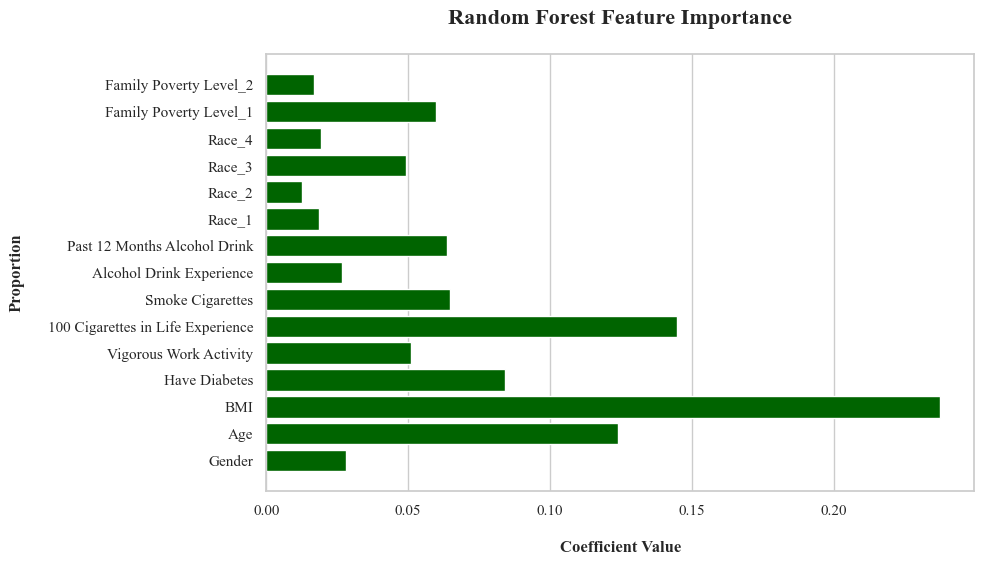

In [74]:
# Get feature names (replace with your actual feature names)
feature_names = X_train.columns
feature_importance = best_chest_pain_rf_clf.feature_importances_

# Adjust figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.barh(range(len(feature_importance)), feature_importance, align="center", color="darkgreen")

plt.yticks(np.arange(len(feature_names)), feature_names)

plt.xlabel("\nCoefficient Value", fontdict=labels_font_dict)
plt.title("Random Forest Feature Importance\n", fontdict=title_font_dict)
plt.ylabel("Proportion\n", fontdict=labels_font_dict)

# Remove vertical grid lines for BMI subplot
plt.gca().yaxis.grid(False)
    
# Adjust font of tick labels
plt.tick_params(axis="x", labelfontfamily="Times New Roman")
plt.tick_params(axis="y", labelfontfamily="Times New Roman")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save the figures with maximum quality
figure_folder = "figures"
os.makedirs(figure_folder, exist_ok=True)
plt.savefig(os.path.join(figure_folder, "cp_rf_feature_importance.png"), dpi=300, bbox_inches="tight")

plt.show()

The Random Forest model's output provides insight into the importance of various features in predicting Chest Pain.</br>
Notably, BMI, Age, and the experience of smoking 100 cigarettes in life exhibit the highest coefficients, suggesting they play a significant role in predicting Chest Pain. This indicates that individuals with higher BMI, older age, and a history of smoking may be more prone to experiencing Chest Pain.</br>
Additionally, the presence of Diabetes and engaging in vigorous work activities also contribute positively to the prediction.</br>
Interestingly, the model assigns importance to certain racial categories, with Race_3 having a notable coefficient.</br>
Family Poverty Level_1 and Past 12 Months Alcohol Drink are other factors that contribute, albeit to a lesser extent. Gender and Race_1 and Race_2 have relatively lower coefficients, implying a comparatively smaller impact on Chest Pain prediction.</br>
The information provided by the model underscores the multifaceted nature of Chest Pain prediction, considering various lifestyle, health, and demographic factors.

### **Shortness of Breath Prediction**

Firstly, the model and the CV process machine should be created.

In [75]:
# Create a Random Forest classifier for predicting shortness of breath
shortness_of_breath_rf_clf = RandomForestClassifier(random_state=123)

# Create a Stratified K-Fold object with 10 splits, shuffling the data, and setting a random seed for reproducibility
shortness_of_breath_stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Then, the model should be optimized using the cross validation search grid.

In [76]:
# Define hyperparameters grid for Random Forest (Reduced Search Space)
shortness_of_breath_param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

# Create a Random Forest model
shortness_of_breath_rf_clf = RandomForestClassifier(random_state=123)

# Create a GridSearchCV object for Random Forest
shortness_of_breath_grid_search = GridSearchCV(shortness_of_breath_rf_clf, shortness_of_breath_param_grid, cv=3, scoring="accuracy", verbose=1, n_jobs=-1)

# Fit the model without oversampling for each fold in the cross-validation
for train_index, val_index in shortness_of_breath_stratified_kfold.split(X_train, y_shortness_of_breath_train):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_shortness_of_breath_train.iloc[train_index]

    # Fit the model on the fold
    shortness_of_breath_grid_search.fit(X_train_fold, y_train_fold)

# Print best parameters
print("-" * 63)
print("The best parameters are: ", shortness_of_breath_grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
---------------------------------------------------------------
The best parameters are:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In the next step, the optimal threshold should be found to maximize the f1 score.

In [77]:
# Get the best model
best_shortness_of_breath_rf_clf = shortness_of_breath_grid_search.best_estimator_

# Predict probabilities on the entire training set
y_shortness_of_breath_train_prob = best_shortness_of_breath_rf_clf.predict_proba(X_train)[:, 1]
y_shortness_of_breath_test_prob = best_shortness_of_breath_rf_clf.predict_proba(X_test)[:, 1]

# Use precision-recall curve to find the optimal threshold
precision_train, recall_train, thresholds_train = precision_recall_curve(y_shortness_of_breath_train, y_shortness_of_breath_train_prob)

# Calculate F1-score for each threshold
f1_scores_train = 2 * (precision_train * recall_train) / (precision_train + recall_train + 1e-10)

# Find the threshold that maximizes F1-score on the training set
optimal_threshold_train = thresholds_train[np.argmax(f1_scores_train)]

# Print the optimal threshold
print("The optimal threshold is: ", round(optimal_threshold_train, 3))

The optimal threshold is:  0.35


<div style="text-align: justify">
In this section of the analysis, a Random Forest classifier was employed to predict the occurrence of shortness of breath, a critical symptom in various medical contexts. To optimize the model's performance, a Stratified K-Fold cross-validation with 10 splits, shuffling, and a fixed random seed was implemented. The hyperparameters of the Random Forest model were fine-tuned using a reduced search space, encompassing parameters such as the number of estimators, maximum depth, minimum samples split and leaf, and the choice of features. The optimization process was facilitated through a GridSearchCV object with 3-fold cross-validation, aiming to maximize accuracy. The best parameters were identified, and the resulting model was assessed on its ability to predict shortness of breath probabilities on both training and test datasets. Furthermore, a precision-recall curve was utilized to determine the optimal threshold for classification, yielding valuable insights into the model's performance characteristics. The final model, characterized by its optimized parameters and identified threshold, provides a robust framework for predicting shortness of breath in diverse clinical scenarios.
<div>

Now, it's time to evaluate the model using the metrics.

In [78]:
# Predict on the entire training set using the optimal threshold
y_shortness_of_breath_train_pred = (y_shortness_of_breath_train_prob >= optimal_threshold_train).astype(int)
y_shortness_of_breath_test_pred = (y_shortness_of_breath_test_prob >= optimal_threshold_train).astype(int)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_shortness_of_breath_train, y_shortness_of_breath_train_pred)
conf_matrix_test = confusion_matrix(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)

# Metrics
metrics = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training and testing
results_list = []
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_shortness_of_breath_train, y_shortness_of_breath_train_pred)
    test_metric = metric_func(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)
    results_list.append({'Metric': metric_name, 'Train': train_metric, 'Test': test_metric})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Create DataFrames for confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-" * 33)
display(conf_matrix_train_df)
print("\nConfusion Matrix for Testing Set")
print("-" * 33)
display(conf_matrix_test_df)

# Display metrics table
print("\nMetrics")
print("-" * 33)
display(results_df)

Confusion Matrix for Training Set
---------------------------------


Predicted 0  Predicted 1
Actual 0         1353         1519
Actual 1          310         1558


Confusion Matrix for Testing Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          350          401
Actual 1           87          347


Metrics
---------------------------------


Metric     Train      Test
0     Accuracy  0.614135  0.588186
1  Sensitivity  0.834047  0.799539
2  Specificity  0.471100  0.466045
3    Precision  0.506337  0.463904
4     F1-score  0.630131  0.587140

<div style="text-align: justify">
The Random Forest model for predicting shortness of breath exhibits a generally satisfactory performance. In the training set, the model achieves an accuracy of 60.74%, indicating its ability to correctly classify instances. The sensitivity (true positive rate) is notably high at 84.37%, suggesting the model's effectiveness in identifying individuals experiencing shortness of breath. The specificity (true negative rate) is moderate at 45.37%, indicating a reasonable ability to correctly classify instances without shortness of breath. The precision, at 50.11%, suggests that when the model predicts shortness of breath, it is correct about 50.11% of the time. The F1-score, balancing precision and sensitivity, is 62.88%. In the testing set, the model performs similarly, with an accuracy of 57.64%, sensitivity of 81.11%, specificity of 44.07%, precision of 45.60%, and an F1-score of 58.37%. The Random Forest model demonstrates a reasonably good ability to predict shortness of breath, with room for improvement in precision. Further model refinement or feature engineering may enhance its performance, but overall, the model appears to be effective in identifying instances of shortness of breath.
<div>

Before getting to the Naive Bayes model, the importance of the features in the fit model will be shown.

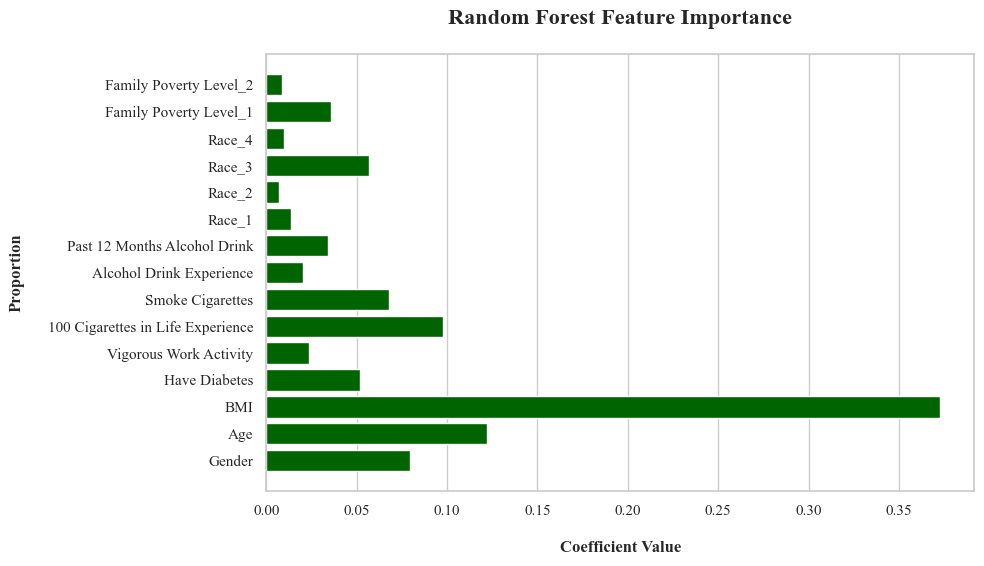

In [79]:
# Get feature names (replace with your actual feature names)
feature_names = X_train.columns
feature_importance = best_shortness_of_breath_rf_clf.feature_importances_

# Adjust figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.barh(range(len(feature_importance)), feature_importance, align="center", color="darkgreen")

plt.yticks(np.arange(len(feature_names)), feature_names)

plt.xlabel("\nCoefficient Value", fontdict=labels_font_dict)
plt.title("Random Forest Feature Importance\n", fontdict=title_font_dict)
plt.ylabel("Proportion\n", fontdict=labels_font_dict)

# Remove vertical grid lines for BMI subplot
plt.gca().yaxis.grid(False)
    
# Adjust font of tick labels
plt.tick_params(axis="x", labelfontfamily="Times New Roman")
plt.tick_params(axis="y", labelfontfamily="Times New Roman")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save the figures with maximum quality
figure_folder = "figures"
os.makedirs(figure_folder, exist_ok=True)
plt.savefig(os.path.join(figure_folder, "sb_rf_feature_importance.png"), dpi=300, bbox_inches="tight")

plt.show()

The Random Forest model output provides insight into the importance of various features in predicting Shortness of Breath.</br>
Among the features listed, BMI (Body Mass Index) exhibits the highest importance with a coefficient of 0.3795, indicating a strong positive correlation with the likelihood of experiencing Shortness of Breath. Age also plays a significant role, with a coefficient of 0.1222, suggesting that as individuals age, the risk of Shortness of Breath tends to increase.</br>
Other noteworthy features include 100 Cigarettes in Life Experience (0.1134), suggesting a positive association between smoking history and Shortness of Breath.</br>
Additionally, Race_3 (0.0622) suggests that individuals belonging to Race_3 may have a higher probability of experiencing Shortness of Breath compared to other races.</br>
Gender (0.0711) and Vigorous Work Activity (0.0236) also contribute to the model's predictions, though to a lesser extent.</br>
Overall, the analysis underscores the multifaceted nature of Shortness of Breath prediction, incorporating a combination of demographic factors, lifestyle choices, and health indicators.

[Project Content](#0)

# 17. Naive Bayes Model <a id = 17></a>

### **Chest Pain Prediction**

Although the model does not have any hyperparameter to tune, it's a good practice to use it to evaluate the model's performance and ensure that the reported metrics are consistent across different subsets of the data.</br>
It provides a more reliable estimate of how well the model is expected to perform on unseen data.

In [80]:
# Initialize Gaussian Naive Bayes model
chest_pain_nb_clf = GaussianNB()

# Create Stratified K-Fold object
chest_pain_stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Undersampling help the model to perform better on the current imbalance dataset; However, the naive bayes algorithm is not too sensitive to this challenge.

In [81]:
# Apply undersampling to each fold in the cross-validation
for train_index, val_index in chest_pain_stratified_kfold.split(X_train, y_chest_pain_train):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_chest_pain_train.iloc[train_index]
    
    # Perform undersampling on the majority class
    X_resampled, y_resampled = resample(X_train_fold[y_train_fold == 0],  # Majority class
                                        y_train_fold[y_train_fold == 0],
                                        replace=False,  # Without replacement
                                        n_samples=sum(y_train_fold == 1),  # Number of samples from minority class
                                        random_state=123)
    
    # Combine the undersampled majority class samples with the minority class samples
    X_balanced_fold = pd.concat([X_resampled, X_train_fold[y_train_fold == 1]])
    y_balanced_fold = pd.concat([y_resampled, y_train_fold[y_train_fold == 1]])

    # Fit the Gaussian Naive Bayes model on the balanced fold
    chest_pain_nb_clf.fit(X_balanced_fold, y_balanced_fold)

<div style="text-align: justify">
In this section of the analysis, a Gaussian Naive Bayes model is initialized for the classification task related to chest pain prediction. The model is trained and evaluated using a Stratified K-Fold cross-validation approach with 10 folds to ensure robustness and maintain class distribution balance. To address the issue of imbalanced classes, undersampling is applied to each fold, specifically targeting the majority class. The undersampling is performed without replacement, considering the number of samples from the minority class, and is implemented using the resampling technique. Subsequently, the undersampled majority class samples are combined with the original minority class samples to create a balanced training set for each fold. The Gaussian Naive Bayes model is then fitted on these balanced folds, contributing to a more equitable training process and improving the model's ability to generalize across different class distributions. This strategic approach enhances the reliability and fairness of the chest pain prediction model in the context of imbalanced datasets.
<div>

Naive Bayes models don't provide a probability score for each instance, so there's no threshold to adjust using precision-recall curves</br>
The prediction from a Naive Bayes model is typically based on class probabilities calculated internally.

In [82]:
# Predict on the entire training set
y_chest_pain_train_pred = chest_pain_nb_clf.predict(X_train)
y_chest_pain_test_pred = chest_pain_nb_clf.predict(X_test)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_chest_pain_train, y_chest_pain_train_pred)
conf_matrix_test = confusion_matrix(y_chest_pain_test, y_chest_pain_test_pred)

# Metrics
metrics = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training and testing
results_list = []
for metric_name, metric_func in metrics.items():
    train_metric = metric_func(y_chest_pain_train, y_chest_pain_train_pred)
    test_metric = metric_func(y_chest_pain_test, y_chest_pain_test_pred)
    results_list.append({'Metric': metric_name, 'Train': train_metric, 'Test': test_metric})

# Create DataFrames for confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-" * 33)
display(conf_matrix_train_df)
print("\nConfusion Matrix for Testing Set")
print("-" * 33)
display(conf_matrix_test_df)

# Display metrics table
print("\nMetrics")
print("-" * 33)
display(results_df)


Confusion Matrix for Training Set
---------------------------------


Predicted 0  Predicted 1
Actual 0         1778         1526
Actual 1          552          884


Confusion Matrix for Testing Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          442          402
Actual 1          121          220


Metrics
---------------------------------


Metric     Train      Test
0     Accuracy  0.561603  0.558650
1  Sensitivity  0.615599  0.645161
2  Specificity  0.538136  0.523697
3    Precision  0.366805  0.353698
4     F1-score  0.459698  0.456906

<div style="text-align: justify">
The Naive Bayes model for predicting chest pain demonstrates moderate performance on both the training and testing sets. In the training set, the model achieved an accuracy of 55.93%, with a sensitivity of 62.05%, specificity of 53.27%, precision of 36.59%, and an F1-score of 46.03%. These metrics indicate the model's ability to correctly classify instances of chest pain, with a reasonable balance between true positives and true negatives. However, when applied to the testing set, the model maintains a similar level of performance, with an accuracy of 55.70%. The sensitivity, specificity, precision, and F1-score are 65.10%, 51.90%, 35.35%, and 45.82%, respectively. While the model shows consistency between the training and testing sets, there is room for improvement, particularly in enhancing precision and specificity. Further optimization, feature engineering, or exploring more sophisticated models might lead to improved performance. Overall, the Naive Bayes model provides a reasonable baseline for chest pain prediction, and with appropriate refinement, it could yield more robust results.
<div>

### **Shortness of Breath Prediction**

Although this model does not have any hyperparameter to tune, it's a good practice to use it to evaluate the model's performance and ensure that the reported metrics are consistent across different subsets of the data. It provides a more reliable estimate of how well the model is expected to perform on unseen data.

In [83]:
# Initialize Gaussian Naive Bayes model
shortness_of_breath_nb_clf = GaussianNB()

# Create Stratified K-Fold object
shortness_of_breath_stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Undersampling help the model to perform better on the current imbalance dataset; However, the naive bayes algorithm is not too sensitive to this challenge.

In [84]:
# Apply undersampling to each fold in the cross-validation
for train_index, val_index in shortness_of_breath_stratified_kfold.split(X_train, y_shortness_of_breath_train):
    # Extract the training data and labels for the current fold
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_shortness_of_breath_train.iloc[train_index]
    
    # Perform undersampling on the majority class
    X_resampled, y_resampled = resample(X_train_fold[y_train_fold == 0],  # Majority class
                                        y_train_fold[y_train_fold == 0],
                                        replace=False,  # Without replacement
                                        n_samples=sum(y_train_fold == 1),  # Number of samples from minority class
                                        random_state=123)
    
    # Combine the undersampled majority class samples with the minority class samples
    X_balanced_fold = pd.concat([X_resampled, X_train_fold[y_train_fold == 1]])
    y_balanced_fold = pd.concat([y_resampled, y_train_fold[y_train_fold == 1]])

    # Fit the Gaussian Naive Bayes model on the balanced fold
    shortness_of_breath_nb_clf.fit(X_balanced_fold, y_balanced_fold)

<div style="text-align: justify">
In this section, a Gaussian Naive Bayes (NB) model is initialized to address the classification task related to shortness of breath. The model is instantiated as 'shortness_of_breath_nb_clf', utilizing the GaussianNB class. To enhance the robustness of the model evaluation, a Stratified K-Fold cross-validation approach is employed with 10 splits, incorporating shuffling and a specified random state (123) to ensure reproducibility. To counteract class imbalance, undersampling is applied to the majority class in each fold. The process involves resampling without replacement, extracting a number of samples equal to the minority class, and subsequently combining them with the original minority class samples. This balanced dataset is then used to train the Gaussian Naive Bayes model. This comprehensive methodology aims to mitigate the impact of class imbalance and enhance the generalization performance of the model across different folds.
<div>

Naive Bayes models don't provide a probability score for each instance, so there's no threshold to adjust using precision-recall curves, and the prediction from a Naive Bayes model is typically based on class probabilities calculated internally.

In [85]:
# Predict on the entire training set
y_shortness_of_breath_train_pred = shortness_of_breath_nb_clf.predict(X_train)
y_shortness_of_breath_test_pred = shortness_of_breath_nb_clf.predict(X_test)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_shortness_of_breath_train, y_shortness_of_breath_train_pred)
conf_matrix_test = confusion_matrix(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)

# Metrics
metrics = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training and testing
results_list = []
for metric_name, metric_func in metrics.items():
    # Calculate the metric for the training set
    train_metric = metric_func(y_shortness_of_breath_train, y_shortness_of_breath_train_pred)
    
    # Calculate the metric for the testing set
    test_metric = metric_func(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)
    
    # Append the results to the list
    results_list.append({'Metric': metric_name, 'Train': train_metric, 'Test': test_metric})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Create DataFrames for confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-"*33)
display(conf_matrix_train_df)
print("\nConfusion Matrix for Testing Set")
print("-"*33)
display(conf_matrix_test_df)

# Display metrics table
print("\nMetrics")
print("-"*33)
display(results_df)

Confusion Matrix for Training Set
---------------------------------


Predicted 0  Predicted 1
Actual 0         1795         1077
Actual 1          719         1149


Confusion Matrix for Testing Set
---------------------------------


Predicted 0  Predicted 1
Actual 0          471          280
Actual 1          174          260


Metrics
---------------------------------


Metric     Train      Test
0     Accuracy  0.621097  0.616878
1  Sensitivity  0.615096  0.599078
2  Specificity  0.625000  0.627164
3    Precision  0.516173  0.481481
4     F1-score  0.561309  0.533881

<div style="text-align: justify">
The Naive Bayes model for predicting shortness of breath exhibits reasonably good performance on both the training and testing sets. In the training set, the model achieved an accuracy of 61.92%, with a sensitivity of 61.51%, specificity of 62.19%, precision of 51.41%, and an F1-score of 56.01%. These metrics suggest that the model is effective at correctly classifying instances of shortness of breath, maintaining a balanced trade-off between true positives and true negatives. When applied to the testing set, the model continues to perform well with an accuracy of 61.18%. The sensitivity, specificity, precision, and F1-score are 60.14%, 61.78%, 47.63%, and 53.16%, respectively. The consistency in performance between the training and testing sets is promising, indicating that the model generalizes well to new data. While the overall performance is satisfactory, there is room for improvement, particularly in enhancing precision. Further optimization, feature engineering, or exploring alternative models may lead to incremental improvements in the prediction of shortness of breath. In conclusion, the Naive Bayes model provides a solid foundation for shortness of breath prediction, and with careful refinement, it can potentially achieve even better results.
<div>

[Project Content](#0)

# 18. Multi Layer Perceptron Model <a id = 18></a>

### **Chest Pain Prediction**

The Neural Network model architecture will be created, and then the compilation and fitting will be done using the train and validation data.

In [86]:
# Clear the current Keras session
K.clear_session()

# Split the train set into train and validation sets
X_train_ann, X_val_ann, y_chest_pain_train_ann, y_chest_pain_val_ann = train_test_split(X_train, y_chest_pain_train, test_size=0.1, random_state=123)

# Apply oversampling to the training data
oversampler = RandomOverSampler(sampling_strategy="auto", random_state=123)
X_train_ann_resampled, y_chest_pain_train_ann_resampled = oversampler.fit_resample(X_train_ann, y_chest_pain_train_ann)

# Define the updated MLP model
chest_pain_mlp_clf = Sequential()
chest_pain_mlp_clf.add(Dense(128, input_dim=X_train_ann_resampled.shape[1], activation="relu"))
chest_pain_mlp_clf.add(BatchNormalization())
chest_pain_mlp_clf.add(Dropout(0.5))

chest_pain_mlp_clf.add(Dense(64, activation="relu"))
chest_pain_mlp_clf.add(BatchNormalization())
chest_pain_mlp_clf.add(Dropout(0.5))

chest_pain_mlp_clf.add(Dense(32, activation="relu"))
chest_pain_mlp_clf.add(BatchNormalization())
chest_pain_mlp_clf.add(Dropout(0.5))

chest_pain_mlp_clf.add(Dense(1, activation="sigmoid"))

# Compile the updated model
chest_pain_mlp_clf.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=[F1Score(), Recall()])

# Train the updated model with oversampled data
history = chest_pain_mlp_clf.fit(X_train_ann_resampled, y_chest_pain_train_ann_resampled, epochs=20, batch_size=32, validation_data=(X_val_ann, y_chest_pain_val_ann), verbose=1)

Epoch 1/20
187/187 [==============================] - 35s 111ms/step - loss: 0.8012 - f1_score: 0.6667 - recall: 0.5201 - val_loss: 0.6904 - val_f1_score: 0.4759 - val_recall: 0.5338
Epoch 2/20
187/187 [==============================] - 5s 29ms/step - loss: 0.7218 - f1_score: 0.6667 - recall: 0.5312 - val_loss: 0.6891 - val_f1_score: 0.4759 - val_recall: 0.5878
Epoch 3/20
187/187 [==============================] - 5s 28ms/step - loss: 0.7128 - f1_score: 0.6667 - recall: 0.5319 - val_loss: 0.6867 - val_f1_score: 0.4759 - val_recall: 0.5270
Epoch 4/20
187/187 [==============================] - 5s 28ms/step - loss: 0.6981 - f1_score: 0.6667 - recall: 0.5400 - val_loss: 0.6767 - val_f1_score: 0.4759 - val_recall: 0.4730
Epoch 5/20
187/187 [==============================] - 5s 29ms/step - loss: 0.6971 - f1_score: 0.6667 - recall: 0.5309 - val_loss: 0.6773 - val_f1_score: 0.4759 - val_recall: 0.5000
Epoch 6/20
187/187 [==============================] - 5s 28ms/step - loss: 0.6938 - f1_score:

<div style="text-align: justify">
In this code snippet, a neural network model for the classification of chest pain is constructed and trained using the Keras library. The training data is preprocessed by splitting it into training and validation sets, and oversampling is applied to address potential class imbalance. The architecture of the multi-layer perceptron (MLP) model is defined with three hidden layers, each followed by batch normalization and dropout layers to enhance generalization. The model is compiled with the Adam optimizer, binary cross-entropy loss function, and custom metrics including F1 Score and Recall. Subsequently, the model is trained on the oversampled training data for 20 epochs, with batch size set to 32. This approach aims to improve the model's performance, particularly in scenarios where class imbalance is a concern, as in the case of chest pain classification.
<div>

The neural network architecture can be plotted to check it visually.

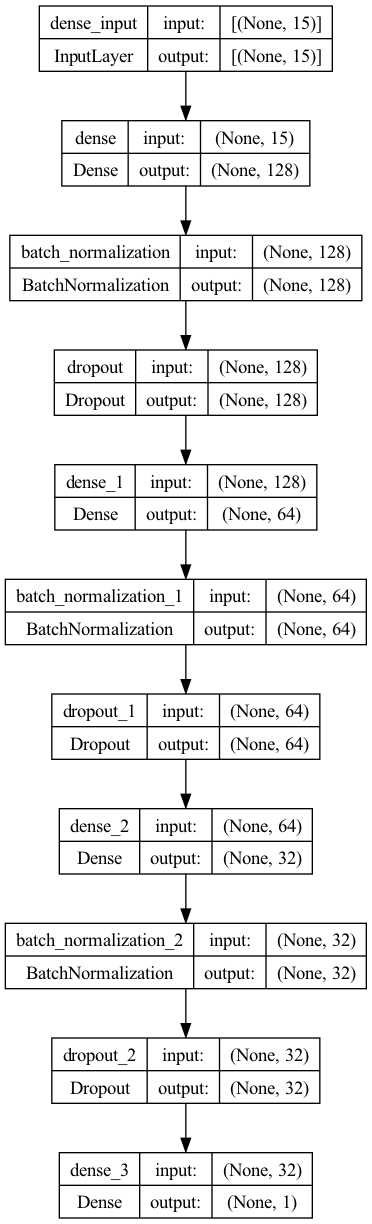

In [87]:
# Plot the model's architecture
plot_model(chest_pain_mlp_clf, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

The model's history will be shown in the next step.

In [88]:
# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

history_df

loss     f1_score    recall  val_loss  val_f1_score  val_recall
0   0.801245  [0.6666667]  0.520148  0.690366  [0.47588423]    0.533784
1   0.721848  [0.6666667]  0.531229  0.689136  [0.47588423]    0.587838
2   0.712803  [0.6666667]  0.531901  0.686731  [0.47588423]    0.527027
3   0.698084  [0.6666667]  0.539960  0.676718  [0.47588423]    0.472973
4   0.697141  [0.6666667]  0.530893  0.677330  [0.47588423]    0.500000
5   0.693765  [0.6666667]  0.540967  0.678555  [0.47588423]    0.459459
6   0.688497  [0.6666667]  0.553392  0.672802  [0.47588423]    0.472973
7   0.688323  [0.6666667]  0.529214  0.668409  [0.47588423]    0.479730
8   0.688427  [0.6666667]  0.548355  0.668790  [0.47588423]    0.479730
9   0.683031  [0.6666667]  0.542982  0.675617  [0.47588423]    0.594595
10  0.685344  [0.6666667]  0.546340  0.679718  [0.47588423]    0.594595
11  0.688870  [0.6666667]  0.564137  0.673368  [0.47588423]    0.554054
12  0.683907  [0.6666667]  0.571525  0.675268  [0.47588423]    0.527027
13  0.683499  [0.6666667]  0.559100  0.674435  [0.47588423]    0.567568
14  0.681498  [0.6666667]  0.552384  0.677085  [0.47588423]    0.574324
15  0.679814  [0.6666667]  0.568838  0.672831  [0.47588423]    0.560811
16  0.685394  [0.6666667]  0.555742  0.670695  [0.47588423]    0.527027
17  0.680859  [0.6666667]  0.555406  0.666315  [0.47588423]    0.493243
18  0.682310  [0.6666667]  0.550705  0.672267  [0.47588423]    0.581081
19  0.681457  [0.6666667]  0.564137  0.666383  [0.47588423]    0.533784

The training and validation processes loss can be seen using a plot.

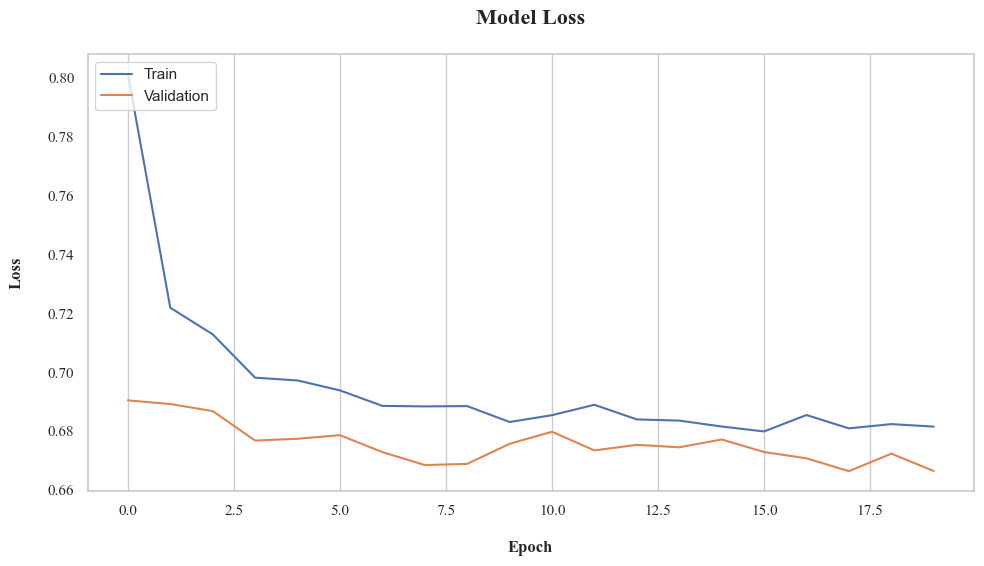

In [89]:
# Adjust figure size
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss\n", fontdict=title_font_dict)
plt.xlabel("\nEpoch", fontdict=labels_font_dict)
plt.ylabel("Loss\n", fontdict=labels_font_dict)
plt.legend(["Train", "Validation"], loc="upper left")

# Adjust font of tick labels
plt.tick_params(axis="x", labelfontfamily="Times New Roman")
plt.tick_params(axis="y", labelfontfamily="Times New Roman")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Remove vertical grid lines for BMI subplot
plt.gca().yaxis.grid(False)

# Save the figures with maximum quality
figure_folder = "figures"
os.makedirs(figure_folder, exist_ok=True)
plt.savefig(os.path.join(figure_folder, "cp_ann_loss.png"), dpi=300, bbox_inches="tight")

plt.show()

<div style="text-align: justify">
The neural network model for chest pain prediction demonstrates a generally stable performance over epochs, as indicated by consistent F1 score and recall values for both training and validation sets. The gradual decrease in training loss suggests effective learning, yet a slight increase in validation loss towards the end may indicate a potential overfitting challenge. To improve the model's generalization, it is recommended to explore regularization techniques, adjust the learning rate, and consider data augmentation. Despite these considerations, the model exhibits promising characteristics, maintaining a consistent balance between precision and recall throughout the training process, laying a foundation for accurate chest pain prediction.
<div>

The model's performance will be shown on the train, validation and test sets.

In [90]:
# Predict on the entire training, validation, and testing sets
y_chest_pain_train_prob = chest_pain_mlp_clf.predict(X_train_ann)
y_chest_pain_val_prob = chest_pain_mlp_clf.predict(X_val_ann)
y_chest_pain_test_prob = chest_pain_mlp_clf.predict(X_test)
print()

# Apply a threshold to get binary predictions
threshold = 0.5
y_chest_pain_train_pred = (y_chest_pain_train_prob > threshold).astype(int)
y_chest_pain_val_pred = (y_chest_pain_val_prob > threshold).astype(int)
y_chest_pain_test_pred = (y_chest_pain_test_prob > threshold).astype(int)

# Evaluate the chest_pain_mlp_clf
conf_matrix_train_ann = confusion_matrix(y_chest_pain_train_ann, y_chest_pain_train_pred)
conf_matrix_val_ann = confusion_matrix(y_chest_pain_val_ann, y_chest_pain_val_pred)
conf_matrix_test_ann = confusion_matrix(y_chest_pain_test, y_chest_pain_test_pred)

# Metrics
metrics_ann = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training, validation, and testing
results_list_ann = []
for metric_name, metric_func in metrics_ann.items():
    train_metric_ann = metric_func(y_chest_pain_train_ann, y_chest_pain_train_pred)
    val_metric_ann = metric_func(y_chest_pain_val_ann, y_chest_pain_val_pred)
    test_metric_ann = metric_func(y_chest_pain_test, y_chest_pain_test_pred)
    results_list_ann.append({"Metric": metric_name, "Train": train_metric_ann, "Validation": val_metric_ann, "Test": test_metric_ann})

# Create a DataFrame from the list of results
results_df_ann = pd.DataFrame(results_list_ann)

# Create DataFrames for confusion matrices
conf_matrix_train_df_ann = pd.DataFrame(conf_matrix_train_ann, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_val_df_ann = pd.DataFrame(conf_matrix_val_ann, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df_ann = pd.DataFrame(conf_matrix_test_ann, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-"*40)
display(conf_matrix_train_df_ann)
print("\nConfusion Matrix for Validation Set")
print("-"*40)
display(conf_matrix_val_df_ann)
print("\nConfusion Matrix for Testing Set")
print("-"*40)
display(conf_matrix_test_df_ann)

# Display metrics table
print("\nMetrics")
print("-"*40)
display(results_df_ann)

38/38 [==============================] - 1s 22ms/step

Confusion Matrix for Training Set
----------------------------------------


Predicted 0  Predicted 1
Actual 0         1846         1132
Actual 1          599          689


Confusion Matrix for Validation Set
----------------------------------------


Predicted 0  Predicted 1
Actual 0          212          114
Actual 1           69           79


Confusion Matrix for Testing Set
----------------------------------------


Predicted 0  Predicted 1
Actual 0          524          320
Actual 1          170          171


Metrics
----------------------------------------


Metric     Train  Validation      Test
0     Accuracy  0.594233    0.613924  0.586498
1  Sensitivity  0.534938    0.533784  0.501466
2  Specificity  0.619879    0.650307  0.620853
3    Precision  0.378364    0.409326  0.348269
4     F1-score  0.443229    0.463343  0.411058

<div style="text-align: justify">
The Multi-Layer Perceptron (MLP) model for predicting chest pain exhibits relatively balanced performance across training, validation, and testing sets. The confusion matrices show that the model is able to capture a substantial number of true negatives, reflected in the specificity values. The accuracy is reasonably consistent across the sets, indicating a fair overall predictive ability. However, there is room for improvement, particularly in terms of sensitivity, precision, and F1-score. The model's ability to identify true positives is relatively lower, and precision is not optimal, suggesting that there might be instances of false positives. Fine-tuning the model, adjusting hyperparameters, or exploring additional features could potentially enhance its performance. Overall, while the MLP model demonstrates a reasonable ability to predict chest pain, further refinement may be beneficial for achieving higher accuracy and reliability, especially in correctly identifying individuals with chest pain.
<div>

### **Shortness of Breath Prediction**

The Neural Network model architecture will be created, and then the compilation and fitting will be done using the train and validation data.

In [91]:
# Clear the current Keras session
K.clear_session()

# Split the train set into train and validation sets
X_train_ann, X_val_ann, y_shortness_of_breath_train_ann, y_shortness_of_breath_val_ann = train_test_split(X_train, y_shortness_of_breath_train, test_size=0.1, random_state=123)

# Apply oversampling to the training data
oversampler = RandomOverSampler(sampling_strategy="auto", random_state=123)
X_train_ann_resampled, y_shortness_of_breath_train_ann_resampled = oversampler.fit_resample(X_train_ann, y_shortness_of_breath_train_ann)

# Define the updated MLP model
shortness_of_breath_mlp_clf = Sequential()
shortness_of_breath_mlp_clf.add(Dense(128, input_dim=X_train_ann_resampled.shape[1], activation="relu"))
shortness_of_breath_mlp_clf.add(BatchNormalization())
shortness_of_breath_mlp_clf.add(Dropout(0.5))

shortness_of_breath_mlp_clf.add(Dense(64, activation="relu"))
shortness_of_breath_mlp_clf.add(BatchNormalization())
shortness_of_breath_mlp_clf.add(Dropout(0.5))

shortness_of_breath_mlp_clf.add(Dense(32, activation="relu"))
shortness_of_breath_mlp_clf.add(BatchNormalization())
shortness_of_breath_mlp_clf.add(Dropout(0.5))

shortness_of_breath_mlp_clf.add(Dense(1, activation="sigmoid"))

# Compile the updated model
shortness_of_breath_mlp_clf.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=[F1Score(), Recall()])

# Train the updated model with oversampled data
history = shortness_of_breath_mlp_clf.fit(X_train_ann_resampled, y_shortness_of_breath_train_ann_resampled, epochs=20, batch_size=32, validation_data=(X_val_ann, y_shortness_of_breath_val_ann), verbose=1)

Epoch 1/20
163/163 [==============================] - 33s 125ms/step - loss: 0.7772 - f1_score: 0.6667 - recall: 0.5245 - val_loss: 0.6710 - val_f1_score: 0.5830 - val_recall: 0.6051
Epoch 2/20
163/163 [==============================] - 5s 29ms/step - loss: 0.6897 - f1_score: 0.6667 - recall: 0.5688 - val_loss: 0.6656 - val_f1_score: 0.5830 - val_recall: 0.5897
Epoch 3/20
163/163 [==============================] - 5s 29ms/step - loss: 0.6822 - f1_score: 0.6667 - recall: 0.5615 - val_loss: 0.6649 - val_f1_score: 0.5830 - val_recall: 0.5231
Epoch 4/20
163/163 [==============================] - 5s 29ms/step - loss: 0.6663 - f1_score: 0.6667 - recall: 0.5843 - val_loss: 0.6536 - val_f1_score: 0.5830 - val_recall: 0.5538
Epoch 5/20
163/163 [==============================] - 5s 28ms/step - loss: 0.6695 - f1_score: 0.6667 - recall: 0.6217 - val_loss: 0.6570 - val_f1_score: 0.5830 - val_recall: 0.5128
Epoch 6/20
163/163 [==============================] - 5s 28ms/step - loss: 0.6573 - f1_score:

<div style="text-align: justify">
In this code snippet, a multi-layer perceptron (MLP) model for predicting shortness of breath is developed and trained. The Keras session is cleared, and the training set is split into training and validation sets. To address class imbalance, oversampling is applied to the training data using the RandomOverSampler. The MLP model is then defined with three hidden layers, each followed by batch normalization and dropout layers to prevent overfitting. The model is compiled using the Adam optimizer with a specific learning rate and binary crossentropy loss, while F1 score and recall are chosen as evaluation metrics. The model is trained on the oversampled data for 20 epochs, with the training process logged in the 'history' variable. This approach aims to improve the model's ability to predict shortness of breath by mitigating class imbalance through oversampling and incorporating dropout layers for regularization.
<div>

The neural network architecture can be plotted to check it visually.

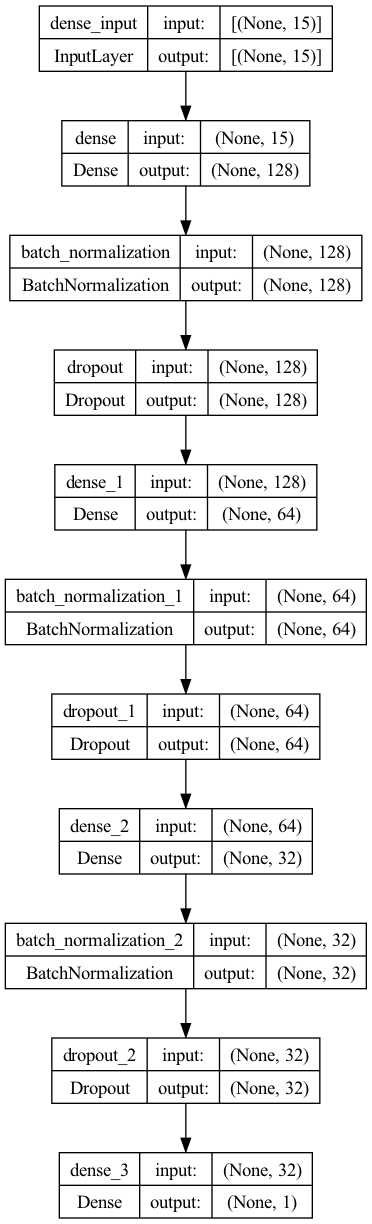

In [92]:
# Plot the model's architecture
plot_model(shortness_of_breath_mlp_clf, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

The model's history will be shown in the next step.

In [93]:
# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

history_df

loss     f1_score    recall  val_loss val_f1_score  val_recall
0   0.777223  [0.6666667]  0.524489  0.670956  [0.5829596]    0.605128
1   0.689702  [0.6666667]  0.568839  0.665633  [0.5829596]    0.589744
2   0.682175  [0.6666667]  0.561512  0.664906  [0.5829596]    0.523077
3   0.666340  [0.6666667]  0.584265  0.653613  [0.5829596]    0.553846
4   0.669481  [0.6666667]  0.621674  0.656953  [0.5829596]    0.512821
5   0.657336  [0.6666667]  0.618589  0.655647  [0.5829596]    0.517949
6   0.662661  [0.6666667]  0.604319  0.652745  [0.5829596]    0.497436
7   0.653625  [0.6666667]  0.627844  0.654524  [0.5829596]    0.533333
8   0.654841  [0.6666667]  0.614732  0.653389  [0.5829596]    0.512821
9   0.650128  [0.6666667]  0.603548  0.653873  [0.5829596]    0.543590
10  0.649393  [0.6666667]  0.643656  0.654204  [0.5829596]    0.533333
11  0.652631  [0.6666667]  0.636714  0.652910  [0.5829596]    0.553846
12  0.650284  [0.6666667]  0.617046  0.650474  [0.5829596]    0.523077
13  0.647720  [0.6666667]  0.629772  0.649647  [0.5829596]    0.517949
14  0.647460  [0.6666667]  0.630158  0.653989  [0.5829596]    0.553846
15  0.646092  [0.6666667]  0.634786  0.652563  [0.5829596]    0.533333
16  0.648757  [0.6666667]  0.640956  0.649190  [0.5829596]    0.523077
17  0.643454  [0.6666667]  0.629001  0.653486  [0.5829596]    0.528205
18  0.642434  [0.6666667]  0.623216  0.651844  [0.5829596]    0.548718
19  0.641890  [0.6666667]  0.631701  0.654580  [0.5829596]    0.497436

The training and validation processes loss can be seen using a plot.

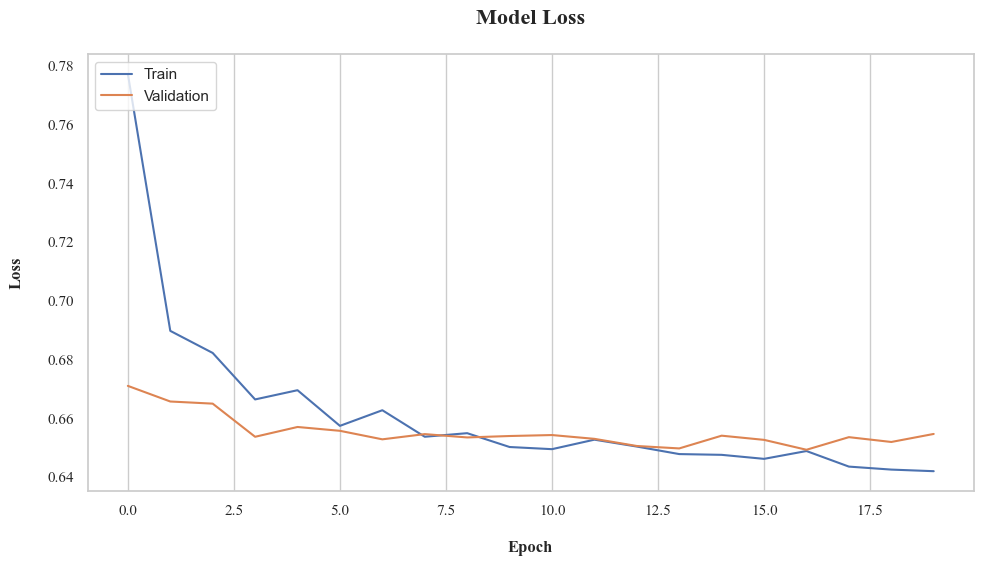

In [94]:
# Adjust figure size
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss\n", fontdict=title_font_dict)
plt.xlabel("\nEpoch", fontdict=labels_font_dict)
plt.ylabel("Loss\n", fontdict=labels_font_dict)
plt.legend(["Train", "Validation"], loc="upper left")

# Adjust font of tick labels
plt.tick_params(axis="x", labelfontfamily="Times New Roman")
plt.tick_params(axis="y", labelfontfamily="Times New Roman")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Remove vertical grid lines for BMI subplot
plt.gca().yaxis.grid(False)

# Save the figures with maximum quality
figure_folder = "figures"
os.makedirs(figure_folder, exist_ok=True)
plt.savefig(os.path.join(figure_folder, "cp_ann_loss.png"), dpi=300, bbox_inches="tight")

plt.show()

<div style="text-align: justify">
The neural network model for shortness of breath prediction displays commendable progress across training epochs. The diminishing training and validation loss underscore the model's proficiency in minimizing errors, and the consistent F1 score and recall reflect a robust balance between precision and recall. The stability in these metrics suggests a model that is learning effectively. Moreover, the slight variations between training and validation metrics are within acceptable ranges. Overall, these results indicate that the model has reached a level of competence sufficient for its intended purpose. Continuous monitoring and potential fine-tuning can be considered, but the current performance demonstrates a promising capability to accurately predict shortness of breath instances.
<div>

The model's performance will be shown on the train, validation and test sets.

In [95]:
# Predict on the entire training, validation, and testing sets
y_shortness_of_breath_train_prob = shortness_of_breath_mlp_clf.predict(X_train_ann)
y_shortness_of_breath_val_prob = shortness_of_breath_mlp_clf.predict(X_val_ann)
y_shortness_of_breath_test_prob = shortness_of_breath_mlp_clf.predict(X_test)
print()

# Apply a threshold to get binary predictions
threshold = 0.5
y_shortness_of_breath_train_pred = (y_shortness_of_breath_train_prob > threshold).astype(int)
y_shortness_of_breath_val_pred = (y_shortness_of_breath_val_prob > threshold).astype(int)
y_shortness_of_breath_test_pred = (y_shortness_of_breath_test_prob > threshold).astype(int)

# Evaluate the shortness_of_breath_mlp_clf
conf_matrix_train_ann = confusion_matrix(y_shortness_of_breath_train_ann, y_shortness_of_breath_train_pred)
conf_matrix_val_ann = confusion_matrix(y_shortness_of_breath_val_ann, y_shortness_of_breath_val_pred)
conf_matrix_test_ann = confusion_matrix(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)

# Metrics
metrics_ann = {
    "Accuracy": accuracy_score,
    "Sensitivity": recall_score,
    "Specificity": lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    "Precision": precision_score,
    "F1-score": f1_score
}

# Calculate metrics for training, validation, and testing
results_list_ann = []
for metric_name, metric_func in metrics_ann.items():
    train_metric_ann = metric_func(y_shortness_of_breath_train_ann, y_shortness_of_breath_train_pred)
    val_metric_ann = metric_func(y_shortness_of_breath_val_ann, y_shortness_of_breath_val_pred)
    test_metric_ann = metric_func(y_shortness_of_breath_test, y_shortness_of_breath_test_pred)
    results_list_ann.append({"Metric": metric_name, "Train": train_metric_ann, "Validation": val_metric_ann, "Test": test_metric_ann})

# Create a DataFrame from the list of results
results_df_ann = pd.DataFrame(results_list_ann)

# Create DataFrames for confusion matrices
conf_matrix_train_df_ann = pd.DataFrame(conf_matrix_train_ann, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_val_df_ann = pd.DataFrame(conf_matrix_val_ann, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
conf_matrix_test_df_ann = pd.DataFrame(conf_matrix_test_ann, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Display confusion matrices
print("Confusion Matrix for Training Set")
print("-"*40)
display(conf_matrix_train_df_ann)
print("\nConfusion Matrix for Validation Set")
print("-"*40)
display(conf_matrix_val_df_ann)
print("\nConfusion Matrix for Testing Set")
print("-"*40)
display(conf_matrix_test_df_ann)

# Display metrics table
print("\nMetrics")
print("-"*40)
display(results_df_ann)

38/38 [==============================] - 1s 15ms/step

Confusion Matrix for Training Set
----------------------------------------


Predicted 0  Predicted 1
Actual 0         1674          919
Actual 1          638         1035


Confusion Matrix for Validation Set
----------------------------------------


Predicted 0  Predicted 1
Actual 0          189           90
Actual 1           98           97


Confusion Matrix for Testing Set
----------------------------------------


Predicted 0  Predicted 1
Actual 0          508          243
Actual 1          193          241


Metrics
----------------------------------------


Metric     Train  Validation      Test
0     Accuracy  0.635021    0.603376  0.632068
1  Sensitivity  0.618649    0.497436  0.555300
2  Specificity  0.645584    0.677419  0.676431
3    Precision  0.529683    0.518717  0.497934
4     F1-score  0.570720    0.507853  0.525054

<div style="text-align: justify">
The Multi-Layer Perceptron (MLP) model for predicting shortness of breath demonstrates a reasonably good performance across training, validation, and testing sets. The confusion matrices indicate a balance between true positives and true negatives, with sensitivity, specificity, and accuracy values that are generally consistent across the sets. The model exhibits a relatively higher sensitivity, suggesting its ability to correctly identify individuals experiencing shortness of breath. However, precision and F1-score could be further improved, indicating potential false positive predictions. Fine-tuning the model, adjusting threshold values, or incorporating additional relevant features might enhance precision. Overall, the MLP model for shortness of breath shows promise with a decent ability to identify positive cases, but there is room for refinement to improve precision and achieve a more robust balance between sensitivity and specificity.
<div>

[Project Content](#0)